### Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import json
import datetime as dt
from datetime import datetime, date, time,timedelta
import pandas as pd
from csv import DictWriter
import urllib
import re,datetime
import os
import time
from os import walk
import re
import  gc
from tqdm.notebook import tqdm

### Importing Weights and creating the stocklist

In [2]:
wgt_lot_path=r'C:\Aman\Nifty correlation\Weights.csv'
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date"])

stock_list=pd.unique(weight['Security Symbol']).tolist()
print(len(stock_list))
for j in stock_list:
    # removing the below stocks as they have incorrect data
    if  j=='ADANIENT' or j=='CROMPGREAV' or j=='CROMPGREAV' or j=='GRASIM' or j=='CENTURYTEX' : 
        print(j)
        stock_list.remove(j)
for i in range(len(stock_list)):
#     print(stock_list[i])
    if stock_list[i]=='BAJAJ-AUTO':
#         print(1)
        stock_list[i]=stock_list[i].replace('-','_')

88
GRASIM


In [4]:
delta='35' #set any delta value and run the entire notebook


############
#INPUTS
#############
data=pd.read_csv(r'C:\Aman\Nifty correlation\08-09\eq_fill_check2.csv',parse_dates = ["Nifty_Date_CE"],dayfirst = True)
output_path=r'C:\Aman\Nifty correlation\nifty 50\with missing stocks/'+delta+' delta'
wgt_lot_path=r'C:\Aman\Nifty correlation\Weights.csv'
index = "Nifty"
index_file_path = r"C:\Aman\Nifty correlation\nifty data\delta greater than 50\NIFTY-I.csv"
stfolder = r"C:\Aman\Nifty correlation\data with greeks\05-50DeltaStrikesAdded"
    
#wgt_lot_path = r"C:\Aman\aman\Dispersion Data\BN Mcap & includeok - Copy.csv"

direc = r"C:\Aman\Nifty correlation\nifty 50\with missing stocks"

#output_path = r"C:\Aman\Correlation"

index_lotsize = 1

initial_equity = 100000




lookback_period = 15
std_dev = 2

#################
#EXPIRY DATES
####################
symbols = stock_list.copy()
symbols.append(index)

exp_file_path = r"C:\Aman\Nifty correlation\expiry_dates_2022.csv"
exp_df = pd.read_csv(exp_file_path,parse_dates = ["curr_exp_date","Date"],dayfirst =True,usecols = ["curr_exp_date","Date"])
#exp_df.rename({'curr_date': 'Date'}, axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_7816\1580620904.py:6: DtypeWarning: Columns (13,14,17,20,23,24,27,29,32,33,36,38,41,42,45,47,74,75,78,80,82,83,86,88,91,92,95,97,99,100,103,105,124,125,128,130,133,134,137,139,159,160,163,165,184,185,188,190,193,194,197,199,218,219,222,224,244,245,248,250,253,254,257,259,262,263,266,268,279,280,283,285,305,306,309,311,314,315,318,320,323,324,327,329,391,392,395,397,408,409,412,414,424,425,428,430,433,434,437,439,442,443,446,448,451,452,455,457,459,460,463,465,468,469,472,474,477,478,481,483,486,487,490,492,495,496,499,501,521,522,525,527,548,549,552,554,557,558,561,563,566,567,570,572,575,576,579,581,602,603,606,608,611,612,615,617,620,621,624,626,629,630,633,635,638,642,645,646,649,651,654,655,658,660,671,672,675,677,705,706,709,711,713,714,717,719,722,723,726,728,747,748,751,753,756,757,760,762,792,793,796,798,810,811,814,816,819,820,823,825,828,829,832,834,846,847,850,852,855,856,859,861,864,865,868,870,881,882,885,887,906,907,910,912,923,

In [5]:
index_file_path

'C:\\Aman\\Nifty correlation\\nifty data\\delta greater than 50\\NIFTY-I.csv'

In [6]:
#Generating the current month stock data files

idx = pd.read_csv(index_file_path,parse_dates = ["Date"],dayfirst = True)
df1 = idx[idx['Ticker'].str.endswith('-I')]

index_file_path = direc + "/Nifty.csv"

df1.to_csv(index_file_path)


print(idx.shape[0])
print(df1.shape[0])
    
for i in stock_list:
    df = pd.read_csv(stfolder + '/' + i + "-I.csv",parse_dates = ["Date"],dayfirst = True)
    df1 = df[df['Ticker'].str.endswith('-I')]

    
    path = direc + '//stdata/' + i + ".csv"
    
    df1.to_csv(path)

    
    print(i,df.shape[0])
    print(i,df1.shape[0])

stfolder = direc
print(index_file_path)

In [7]:
stfolder = direc+"/stdata"
index_file_path = direc + "/Nifty.csv"
stfolder

'C:\\Aman\\Nifty correlation\\nifty 50\\with missing stocks/stdata'

In [8]:
#Separating out ATM CE and PE for stocks and Index - CURRENT month contracts
from tqdm.notebook import tqdm
stfolder = direc+"/stdata"

#from tqdm.autonotebook
idx = pd.read_csv(index_file_path,usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","Delta_"+delta+"_Strike"],parse_dates = ["Date"])

idx=idx[~((idx['Date'] > '25-11-2021'))]

idx = pd.merge(idx, exp_df, on = 'Date', how = 'left')

idx_ce = idx[(idx["Strike"] == idx["Delta_"+delta+"_Strike"]) & (idx["Option_Type"] == "CE")].add_suffix("_CE")
idx_pe = idx[(idx["Strike"] == idx["Delta_"+delta+"_Strike"]) & (idx["Option_Type"] == "PE")].add_suffix("_PE")


final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])

final = final.T.drop_duplicates().T  #Drop Duplicates Columns

final = final.add_prefix(index +"_")
final = final.sort_values(by=index +"_"+'Date_CE')

final.to_csv(output_path+"/check-1data.csv")

#print(final)
for i in tqdm(stock_list):
    if i=='BAJAJ-AUTO':
        i=i.replace('-','_')
    print(i)
    df1 = pd.read_csv(stfolder+ '/' + i + ".csv",parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
                                                                    "OPT_Close","EQ_Close","IV","Delta_"+delta+"_Strike"])


    df1 = pd.merge(df1, exp_df, on = 'Date', how = 'left')
    
    
    df_ce = df1[(df1["Strike"] == df1["Delta_"+delta+"_Strike"]) & (df1["Option_Type"] == "CE")].add_suffix("_CE")
    df_pe = df1[(df1["Strike"] == df1["Delta_"+delta+"_Strike"]) & (df1["Option_Type"] == "PE")].add_suffix("_PE")
    print(df1.shape[0], df_ce.shape[0], df_pe.shape[0])
    temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    temp = temp.T.drop_duplicates().T
    temp = temp.add_prefix(i +"_")
    
    final = final.merge(temp,how='left',left_on=index + '_Date_CE', right_on= i + '_Date_CE')
    
final = final.T.drop_duplicates().T
curr_final_df = final.copy()
u = curr_final_df.select_dtypes(exclude=['datetime'])
curr_final_df[u.columns] = u.fillna(0)

curr_final_df.to_csv(output_path+"/check-2data.csv")


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:56: UserWarning: Parsing '25-11-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.gt)


  0%|          | 0/87 [00:00<?, ?it/s]

ACC
56260 2808 2806
AMBUJACEM
49533 2808 2807
AXISBANK
90465 2808 2808
BAJAJ_AUTO
52359 2787 2786
BHEL
72448 2808 2808
BPCL
66156 2808 2807
BHARTIARTL
73332 2808 2808
CAIRN
23591 1544 1544
CIPLA
61293 2808 2806
DLF
76966 2808 2808
DRREDDY
65340 2787 2755
GAIL
50145 2808 2807
HCLTECH
65585 2808 2797
HDFCBANK
80722 2808 2808
HEROHONDA
1911 159 159
HINDALCO
74504 2808 2808
HINDUNILVR
69702 2808 2808
HDFC
79827 2808 2808
ITC
86354 2809 2809
ICICIBANK
105236 2977 2977
INFY
94255 2688 2688
IDFC
36703 2193 2193
JPASSOCIAT
25551 2006 2003
JINDALSTEL
60646 2809 2809
KOTAKBANK
66878 2803 2801
LT
85804 2809 2809
M&M
69548 2809 2809
MARUTI
94425 2809 2809
NTPC
65842 2809 2809
ONGC
69614 2809 2809
POWERGRID
51028 2809 2808
PNB
67810 2797 2772
RANBAXY
15977 1040 1040
RELCAPITAL
47299 2130 2130
RCOM
38991 1991 1991
RELIANCE
115818 2809 2809
RELINFRA
45598 2130 2130
RPOWER
31200 2069 2066
SESAGOA
8396 690 690
SIEMENS
36770 2759 2679
SBIN
118252 2808 2808
SAIL
59111 2809 2809
STER
6983 651 651
SUNPHARM

In [9]:
# curr_final_df.to_csv(output_path+"/check-2data.csv")


In [10]:
data=curr_final_df

# Adding Weights Columns

In [12]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date"])
grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
for i in stock_list:
    if i=='BAJAJ_AUTO':
        i=i.replace('_','-')
    d1 = grp.get_group(i)
    if i=='BAJAJ-AUTO':
        i=i.replace('-','_')
    d1[i + "_OG_Weight"] = d1["Weightage"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight"]],on= index+ "_Date_CE", how='left')

if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

display(data)

C:\Users\admin\AppData\Local\Temp\ipykernel_7816\2250389331.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[index + "_OG_Weight"] = 100
C:\Users\admin\AppData\Local\Temp\ipykernel_7816\2250389331.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[i + "_OG_Weight"] = d1["Weightage"]
C:\Users\admin\AppData\Local\Temp\ipykernel_7816\2250389331.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

85529
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,Nifty_IV_CE,Nifty_EQ_Close_CE,Nifty_curr_exp_date_CE,Nifty_Ticker_PE,Nifty_OPT_Close_PE,Nifty_Strike_PE,...,BAJAJFINSV_OG_Weight,TITAN_OG_Weight,JSWSTEEL_OG_Weight,BRITANNIA_OG_Weight,NESTLEIND_OG_Weight,SHREECEM_OG_Weight,HDFCLIFE_OG_Weight,DIVISLAB_OG_Weight,SBILIFE_OG_Weight,TATACONSUM_OG_Weight
0,2016-01-01,NIFTY8100CE-I,63.75,8100.0,0.1254,7963.20,2016-01-28,NIFTY7900PE-I,80.30,7900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-04,NIFTY7950CE-I,64.95,7950.0,0.1491,7791.30,2016-01-28,NIFTY7700PE-I,86.60,7700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-05,NIFTY7900CE-I,74.80,7900.0,0.1460,7784.65,2016-01-28,NIFTY7700PE-I,85.30,7700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-06,NIFTY7850CE-I,70.25,7850.0,0.1412,7741.00,2016-01-28,NIFTY7650PE-I,83.15,7650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-07,NIFTY7700CE-I,73.20,7700.0,0.1648,7568.30,2016-01-28,NIFTY7450PE-I,87.05,7450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,2021-11-24,NIFTY17450CE-I,41.50,17450.0,0.1546,17415.05,2021-11-25,NIFTY17350PE-I,37.90,17350.0,...,1.41,1.35,0.82,0.57,0.93,0.47,0.86,0.84,0.69,0.63
1518,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,1.41,1.35,0.82,0.57,0.93,0.47,0.86,0.84,0.69,0.63
1519,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,1.41,1.35,0.82,0.57,0.93,0.47,0.86,0.84,0.69,0.63
1520,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,1.41,1.35,0.82,0.57,0.93,0.47,0.86,0.84,0.69,0.63


In [13]:
data

,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,Nifty_IV_CE,Nifty_EQ_Close_CE,Nifty_curr_exp_date_CE,Nifty_Ticker_PE,Nifty_OPT_Close_PE,Nifty_Strike_PE,...,BAJAJFINSV_OG_Weight,TITAN_OG_Weight,JSWSTEEL_OG_Weight,BRITANNIA_OG_Weight,NESTLEIND_OG_Weight,SHREECEM_OG_Weight,HDFCLIFE_OG_Weight,DIVISLAB_OG_Weight,SBILIFE_OG_Weight,TATACONSUM_OG_Weight
0,2016-01-01,NIFTY8100CE-I,63.75,8100.0,0.1254,7963.20,2016-01-28,NIFTY7900PE-I,80.30,7900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-04,NIFTY7950CE-I,64.95,7950.0,0.1491,7791.30,2016-01-28,NIFTY7700PE-I,86.60,7700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-05,NIFTY7900CE-I,74.80,7900.0,0.1460,7784.65,2016-01-28,NIFTY7700PE-I,85.30,7700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-06,NIFTY7850CE-I,70.25,7850.0,0.1412,7741.00,2016-01-28,NIFTY7650PE-I,83.15,7650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-07,NIFTY7700CE-I,73.20,7700.0,0.1648,7568.30,2016-01-28,NIFTY7450PE-I,87.05,7450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,2021-11-24,NIFTY17450CE-I,41.50,17450.0,0.1546,17415.05,2021-11-25,NIFTY17350PE-I,37.90,17350.0,...,1.41,1.35,0.82,0.57,0.93,0.47,0.86,0.84,0.69,0.63
1518,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,1.41,1.35,0.82,0.57,0.93,0.47,0.86,0.84,0.69,0.63
1519,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,1.41,1.35,0.82,0.57,0.93,0.47,0.86,0.84,0.69,0.63
1520,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,1.41,1.35,0.82,0.57,0.93,0.47,0.86,0.84,0.69,0.63


### Adding Final Weight Columns

In [14]:
#
for i in range(len(stock_list)):
#     print(stock_list[i])
    if stock_list[i]=='BAJAJ-AUTO':
#         print(1)
        stock_list[i]=stock_list[i].replace('-','_')

filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [15]:
u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,Nifty_IV_CE,Nifty_EQ_Close_CE,Nifty_curr_exp_date_CE,Nifty_Ticker_PE,Nifty_OPT_Close_PE,Nifty_Strike_PE,...,TITAN_Final_Weight,JSWSTEEL_Final_Weight,BRITANNIA_Final_Weight,NESTLEIND_Final_Weight,SHREECEM_Final_Weight,HDFCLIFE_Final_Weight,DIVISLAB_Final_Weight,SBILIFE_Final_Weight,TATACONSUM_Final_Weight,Nifty_Final_Weight
0,2016-01-01,NIFTY8100CE-I,63.75,8100.0,0.1254,7963.20,2016-01-28,NIFTY7900PE-I,80.30,7900.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,2016-01-04,NIFTY7950CE-I,64.95,7950.0,0.1491,7791.30,2016-01-28,NIFTY7700PE-I,86.60,7700.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2016-01-05,NIFTY7900CE-I,74.80,7900.0,0.1460,7784.65,2016-01-28,NIFTY7700PE-I,85.30,7700.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,2016-01-06,NIFTY7850CE-I,70.25,7850.0,0.1412,7741.00,2016-01-28,NIFTY7650PE-I,83.15,7650.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,2016-01-07,NIFTY7700CE-I,73.20,7700.0,0.1648,7568.30,2016-01-28,NIFTY7450PE-I,87.05,7450.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,2021-11-24,NIFTY17450CE-I,41.50,17450.0,0.1546,17415.05,2021-11-25,NIFTY17350PE-I,37.90,17350.0,...,0.013618,0.008272,0.00575,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1
1518,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,0.013618,0.008272,0.00575,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1
1519,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,0.013618,0.008272,0.00575,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1
1520,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,0.013618,0.008272,0.00575,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1


### Adding entry and exit signals

In [16]:
df1 = data.copy()
#df1['dispersion_entry'] = False #(df1['bb_signal'] == -1) & (df1['exit_ratio'] > 0)  & (df1['entry_ratio'].isna() == True)
#df1['dispersion_exit'] = False #(df1['bb_signal'] == 0) & (df1['entry_ratio'] > 0) & (df1['entry_ratio'].isna() == False)

df1['correlation_entry'] = np.nan
df1['correlation_exit'] = np.nan
df1['bb_signal'] = np.nan

#df1['correlation_entry'] = (df1['bb_signal'] == 1) & (df1['entry_ratio'] > 0)  & (df1['exit_ratio'].isna() == True)
#df1['correlation_exit'] = (df1['bb_signal'] == 0)  & (df1['exit_ratio'] > 0)  & (df1['exit_ratio'].isna() == False):

df1['bb_signal'] = df1.apply(lambda x: 0 if x['Nifty_Date_CE']==x['Nifty_curr_exp_date_CE'] else 1, axis=1)



for i in range(len(df1)):
    if(i==0): #for the First trade
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
        
        #If previous day was expiry current day entry is set to true
    elif (df1.loc[i-1,'Nifty_Date_CE'] == df1.loc[i-1,'Nifty_curr_exp_date_CE']):  
        df1.loc[i,'correlation_entry'] = True
        df1.loc[i,'correlation_exit'] = False
        
        #If CURRENT day IS expiry, current day Exit is set to true
    elif (df1.loc[i,'Nifty_Date_CE'] == df1.loc[i,'Nifty_curr_exp_date_CE']):
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = True
    
    
    else: # for The rest of the days
        df1.loc[i,'correlation_entry'] = False
        df1.loc[i,'correlation_exit'] = False

display(df1)          
    

,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,Nifty_IV_CE,Nifty_EQ_Close_CE,Nifty_curr_exp_date_CE,Nifty_Ticker_PE,Nifty_OPT_Close_PE,Nifty_Strike_PE,...,NESTLEIND_Final_Weight,SHREECEM_Final_Weight,HDFCLIFE_Final_Weight,DIVISLAB_Final_Weight,SBILIFE_Final_Weight,TATACONSUM_Final_Weight,Nifty_Final_Weight,correlation_entry,correlation_exit,bb_signal
0,2016-01-01,NIFTY8100CE-I,63.75,8100.0,0.1254,7963.20,2016-01-28,NIFTY7900PE-I,80.30,7900.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,True,False,1
1,2016-01-04,NIFTY7950CE-I,64.95,7950.0,0.1491,7791.30,2016-01-28,NIFTY7700PE-I,86.60,7700.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,False,False,1
2,2016-01-05,NIFTY7900CE-I,74.80,7900.0,0.1460,7784.65,2016-01-28,NIFTY7700PE-I,85.30,7700.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,False,False,1
3,2016-01-06,NIFTY7850CE-I,70.25,7850.0,0.1412,7741.00,2016-01-28,NIFTY7650PE-I,83.15,7650.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,False,False,1
4,2016-01-07,NIFTY7700CE-I,73.20,7700.0,0.1648,7568.30,2016-01-28,NIFTY7450PE-I,87.05,7450.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,2021-11-24,NIFTY17450CE-I,41.50,17450.0,0.1546,17415.05,2021-11-25,NIFTY17350PE-I,37.90,17350.0,...,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,False,False,1
1518,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,False,True,0
1519,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,True,False,0
1520,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,17500.0,...,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,True,False,0


In [17]:
df2 = df1.copy()


df2.to_csv(output_path + '/with entry exit signals_all data.csv')

In [19]:
df = df2[  (df2["correlation_exit"] == True) | 
               (df2["correlation_entry"] == True) ].reset_index()

df.to_csv(output_path + '/with entry exit signals.csv')
df

,index,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,Nifty_IV_CE,Nifty_EQ_Close_CE,Nifty_curr_exp_date_CE,Nifty_Ticker_PE,Nifty_OPT_Close_PE,...,NESTLEIND_Final_Weight,SHREECEM_Final_Weight,HDFCLIFE_Final_Weight,DIVISLAB_Final_Weight,SBILIFE_Final_Weight,TATACONSUM_Final_Weight,Nifty_Final_Weight,correlation_entry,correlation_exit,bb_signal
0,0,2016-01-01,NIFTY8100CE-I,63.75,8100.0,0.1254,7963.20,2016-01-28,NIFTY7900PE-I,80.30,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,True,False,1
1,18,2016-01-28,NIFTY9600CE-I,0.05,9600.0,5.0000,7424.65,2016-01-28,NIFTY7400PE-I,0.05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,False,True,0
2,19,2016-01-29,NIFTY7700CE-I,61.20,7700.0,0.1291,7563.55,2016-02-25,NIFTY7450PE-I,84.80,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,True,False,1
3,38,2016-02-25,NIFTY9450CE-I,0.05,9450.0,5.0000,6970.60,2016-02-25,NIFTY6950PE-I,0.05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,False,True,0
4,39,2016-02-26,NIFTY7250CE-I,83.05,7250.0,0.1838,7029.75,2016-03-31,NIFTY6900PE-I,113.85,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1453,2021-10-29,NIFTY18050CE-I,170.35,18050.0,0.1557,17671.65,2021-11-25,NIFTY17450PE-I,199.00,...,0.008875,0.005043,0.008371,0.008674,0.006657,0.006354,1,True,False,1
144,1518,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,...,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,False,True,0
145,1519,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,...,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,True,False,0
146,1520,2021-11-25,NIFTY20000CE-I,0.05,20000.0,5.0000,17536.25,2021-11-25,NIFTY17500PE-I,0.05,...,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,True,False,0


In [20]:
df=pd.read_csv(output_path + '/with entry exit signals.csv')

In [21]:
for i in range(len(stock_list)):
#     print(stock_list[i])
    if stock_list[i]=='BAJAJ-AUTO':
#         print(1)
        stock_list[i]=stock_list[i].replace('-','_')
    
#removing stocks which had their names changed
stock_list.remove('HEROHONDA')
stock_list.remove('RANBAXY')
stock_list.remove('STER')
stock_list.remove('SESAGOA')
stock_list.remove('INFOSYSTCH')
stock_list.remove('SSLT')

In [23]:
trades = []
index='Nifty'
for i in df.index[:-1]:
    if df["bb_signal"][i] == 1:
        print(i)
        #if df[index + "_Date_CE"][i]=='2016-04-01':
        strikes_ce = {}
        strikes_pe = {}
        strikes_ce[index] = df[index + "_Strike_CE"][i]
        strikes_pe[index] = df[index + "_Strike_PE"][i]
        for j in stock_list:
            if j=='AREVAT_D' or j=='L_TFH' or j=='M_M' or j=='M_MFIN' :    
                j=j.replace('_','&')

            strikes_ce[j] = df[j+"_Strike_CE"][i]
#                 if j=='IEX' or j=='AXISBANK':
            if j+"_Strike_PE" not in df.columns:
                     strikes_pe[j] = df[j+"_Strike_CE"][i]
            else:
                strikes_pe[j] = df[j+"_Strike_PE"][i]
        trades.append( 
                        { 
                          "entry_date": df[index + "_Date_CE"][i],
                          "exit_date" : df[index + "_Date_CE"][i+1],
                          "expiry_date" : df[index+"_curr_exp_date_CE"][i],
                          "type_of_trade": "LISS",
                          "strike_ce" : strikes_ce,
                            "strike_pe" : strikes_pe
                        }
                      )

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
143


In [25]:
# index_file_path=r'C:\Aman\Nifty correlation\nifty data\NIFTY-I.csv'
# l1=['ACC']
# stfolder=r'C:\Aman\Nifty correlation\data with greeks\05-50DeltaStrikesAdded'
import warnings
warnings.filterwarnings("ignore")
stock_list1=['ACC']
for i in tqdm(trades):
    date1 = i["entry_date"]
    date2 = i["exit_date"]
#     if date1=='2016-04-01':
#             print(1)
    expiry = i["expiry_date"]
    print(date1)
    print(date2)

    if expiry == date1:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        #nextdf = pd.read_csv(index_file_path.replace(index,index+"-II"),parse_dates = ["Date"])

        df = df[(df["Date"] > date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike_ce"][index])]
        xxx
#         nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Strike"] == i["strike"][index])]
#         nextdf = nextdf.append(df)
#         nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = nextdf

        for j in stock_list:
            if j=='AREVAT_D' or j=='L_TFH' or j=='M_M' or j=='M_MFIN' :    
                j=j.replace('_','&')
            path = stfolder + '/' + j + "-I.csv"
            df = pd.read_csv(path,parse_dates = ["Date"])
            print(df)
#             nextdf = pd.read_csv(path.replace(j,j+"-II"),parse_dates = ["Date"])

            df = df[((df["Date"] >= date1) & (df["Date"] <= date2)) & ((df["Strike"] == i["strike_ce"][j]) | (df["Strike"] == i["strike_pe"][j]))]
#             nextdf = nextdf[(nextdf["Date"] == expiry) & (nextdf["Final_strike"] == i["strike"][j])]
#             nextdf = nextdf.append(df)
#             nextdf = pd.merge(nextdf, exp_df, on = 'Date', how = 'left')
#             df_dict[j] = nextdf
        i["dataframes"] = df_dict

    else:
        df = pd.read_csv(index_file_path,parse_dates = ["Date"])
        #df = df[(df["Date"] >= date1) & (df["Date"] <= date2) & (df["Strike"] == i["strike_ce"][index])]
        a=df[((df["Date"] >= date1) & (df["Date"] <= date2)) & ((df["Strike"] == i["strike_ce"][index]) ) & (df['Option_Type']=='CE')]#.add_suffix("_CE")
        b=df[((df["Date"] >= date1) & (df["Date"] <= date2)) & ((df["Strike"] == i["strike_pe"][index])  & (df['Option_Type']=='PE'))]#.add_suffix("_PE")
        df=a.append(b)
        df = pd.merge(df, exp_df, on = 'Date', how = 'left')
        df_dict = {}
        df_dict[index] = df

        for j in stock_list:
            if j=='AREVAT_D' or j=='L_TFH' or j=='M_M' or j=='M_MFIN' :    
                    j=j.replace('_','&')
            df = pd.read_csv(stfolder + '/' + j + ".csv",parse_dates = ["Date"])
            #df = df[((df["Date"] >= date1) & (df["Date"] <= date2)) & ((df["Strike"] == i["strike_ce"][j]) | (df["Strike"] == i["strike_pe"][j]))]
            x=df[((df["Date"] >= date1) & (df["Date"] <= date2)) & ((df["Strike"] == i["strike_ce"][j]) ) & (df['Option_Type']=='CE')]#.add_suffix("_CE")
            y=df[((df["Date"] >= date1) & (df["Date"] <= date2)) & ((df["Strike"] == i["strike_pe"][j])  & (df['Option_Type']=='PE'))]#.add_suffix("_PE")
            df=x.append(y)
            
            df = pd.merge(df, exp_df, on = 'Date', how = 'left')
            
            df_dict[j] = df
        i["dataframes"] = df_dict
        

  0%|          | 0/71 [00:00<?, ?it/s]

2016-01-01
2016-01-28
2016-01-29
2016-02-25
2016-02-26
2016-03-31
2016-04-01
2016-04-28
2016-04-29
2016-05-26
2016-05-27
2016-06-30
2016-07-01
2016-07-28
2016-07-29
2016-08-25
2016-08-26
2016-09-29
2016-09-30
2016-10-27
2016-10-28
2016-11-24
2016-11-25
2016-12-29
2016-12-30
2017-01-25
2017-01-27
2017-02-23
2017-02-27
2017-03-30
2017-03-31
2017-04-27
2017-04-28
2017-05-25
2017-05-26
2017-06-29
2017-06-30
2017-07-27
2017-07-28
2017-08-31
2017-09-01
2017-09-28
2017-09-29
2017-10-26
2017-10-27
2017-11-30
2017-12-01
2017-12-28
2017-12-29
2018-01-25
2018-01-29
2018-02-22
2018-02-23
2018-03-28
2018-04-02
2018-04-26
2018-04-27
2018-05-31
2018-06-01
2018-06-28
2018-06-29
2018-07-26
2018-07-27
2018-08-30
2018-08-31
2018-09-27
2018-09-28
2018-10-25
2018-10-26
2018-11-29
2018-11-30
2018-12-27
2018-12-28
2019-01-31
2019-02-01
2019-02-28
2019-03-01
2019-03-28
2019-03-29
2019-04-25
2019-04-26
2019-05-30
2019-05-31
2019-06-27
2019-06-28
2019-07-25
2019-07-26
2019-08-29
2019-08-30
2019-09-26
2019-09-27

In [26]:
#Separating CE and PE in every dataframe to format into coloumns

result = pd.DataFrame()
for trade_dict in tqdm(trades):
    df_dict = trade_dict["dataframes"]
    entry = trade_dict["entry_date"]
    exit = trade_dict["exit_date"]
    
    idx = df_dict[index][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date"]]
    
    idx_ce = idx[(idx["Option_Type"] == "CE")].add_suffix("_CE")
    idx_pe = idx[(idx["Option_Type"] == "PE")].add_suffix("_PE")

    final = idx_ce.merge(idx_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
    final = final.add_prefix(index +"_")
    
    for i in df_dict:
        if i == index:
            continue
        #i='AXISBANK'
        print(i)
        df1 = df_dict[i][["Date","Ticker","OPT_Close","Strike","Option_Type","IV","EQ_Close","curr_exp_date"]]
        df_ce = df1[(df1["Option_Type"] == "CE")].add_suffix("_CE")
        df_pe = df1[(df1["Option_Type"] == "PE")].add_suffix("_PE")
        df_ce = df_ce.add_prefix(i +"_")
        df_pe = df_pe.add_prefix(i +"_")
#         temp = df_ce.merge(df_pe, left_on='Date_CE', right_on='Date_PE').drop(columns = ["Option_Type_PE","Option_Type_CE"])
#         temp = temp.T.drop_duplicates().T
            
#         temp = temp.add_prefix(i +"_")
        
        final = final.merge(df_ce,left_on=index + '_Date_CE' , right_on=i + '_Date_CE', how = 'left')
        final = final.merge(df_pe,left_on=index + '_Date_CE' , right_on= i +'_Date_PE', how = 'left').drop(columns = [i +"_"+"Option_Type_PE",i +"_"+"Option_Type_CE"])
        
        #final = final.T.drop_duplicates().T
        
        #final = final.add_prefix(i +"_")
#         for idi,row in final.iterrows():
#             date=final.loc[idi,'Nifty_Date_CE']
#             if final.loc[idi,i+'_OPT_Close_PE']=np.nan and temp.loc[,i+'_OPT_Close_PE']=np.nan 
    final["Trade_Type"] = trade_dict["type_of_trade"]
    
    conditions = [
    (final[index + '_Date_CE'] == entry),
    (final[index + '_Date_CE'] == exit),
    (final[index + '_Date_CE'] != exit) & (final[index + '_Date_CE'] != entry)]

    # create a list of the values we want to assign for each condition
    values = ['F', 'L', 'M']

    # create a new column and use np.select to assign values to it using our lists as arguments
    final['D_marker'] = np.select(conditions, values)
    result = result.append(final)
    
result = result.T.drop_duplicates().T

  0%|          | 0/71 [00:00<?, ?it/s]

ACC
AMBUJACEM
AXISBANK
BAJAJ_AUTO
BHEL
BPCL
BHARTIARTL
CAIRN
CIPLA
DLF
DRREDDY
GAIL
HCLTECH
HDFCBANK
HINDALCO
HINDUNILVR
HDFC
ITC
ICICIBANK
INFY
IDFC
JPASSOCIAT
JINDALSTEL
KOTAKBANK
LT
M&M
MARUTI
NTPC
ONGC
POWERGRID
PNB
RELCAPITAL
RCOM
RELIANCE
RELINFRA
RPOWER
SIEMENS
SBIN
SAIL
SUNPHARMA
SUZLON
TCS
TATAMOTORS
TATAPOWER
TATASTEEL
WIPRO
HEROMOTOCO
COALINDIA
ASIANPAINT
BANKBARODA
LUPIN
ULTRACEMCO
INDUSINDBK
NMDC
MCDOWELL-N
TECHM
ZEEL
IDEA
YESBANK
BOSCHLTD
VEDL
ADANIPORTS
AUROPHARMA
INFRATEL
EICHERMOT
TATAMTRDVR
BAJFINANCE
HINDPETRO
IBULHSGFIN
IOC
UPL
BAJAJFINSV
TITAN
JSWSTEEL
BRITANNIA
NESTLEIND
SHREECEM
HDFCLIFE
DIVISLAB
SBILIFE
TATACONSUM
ACC
AMBUJACEM
AXISBANK
BAJAJ_AUTO
BHEL
BPCL
BHARTIARTL
CAIRN
CIPLA
DLF
DRREDDY
GAIL
HCLTECH
HDFCBANK
HINDALCO
HINDUNILVR
HDFC
ITC
ICICIBANK
INFY
IDFC
JPASSOCIAT
JINDALSTEL
KOTAKBANK
LT
M&M
MARUTI
NTPC
ONGC
POWERGRID
PNB
RELCAPITAL
RCOM
RELIANCE
RELINFRA
RPOWER
SIEMENS
SBIN
SAIL
SUNPHARMA
SUZLON
TCS
TATAMOTORS
TATAPOWER
TATASTEEL
WIPRO
HEROMOTOCO
COALIN

In [27]:
result

,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,Nifty_IV_CE,Nifty_EQ_Close_CE,Nifty_curr_exp_date_CE,Nifty_Ticker_PE,Nifty_OPT_Close_PE,Nifty_Strike_PE,...,TATACONSUM_curr_exp_date_CE,TATACONSUM_Date_PE,TATACONSUM_Ticker_PE,TATACONSUM_OPT_Close_PE,TATACONSUM_Strike_PE,TATACONSUM_IV_PE,TATACONSUM_EQ_Close_PE,TATACONSUM_curr_exp_date_PE,Trade_Type,D_marker
0,2016-01-01,NIFTY8100CE-I,63.75,8100.0,0.1254,7963.2,2016-01-28,NIFTY7900PE-I,80.3,7900.0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,LISS,F
1,2016-01-04,NIFTY8100CE-I,26.85,8100.0,0.1454,7791.3,2016-01-28,NIFTY7900PE-I,173.2,7900.0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,LISS,M
2,2016-01-05,NIFTY8100CE-I,23.15,8100.0,0.1436,7784.65,2016-01-28,NIFTY7900PE-I,171.75,7900.0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,LISS,M
3,2016-01-06,NIFTY8100CE-I,14.25,8100.0,0.1399,7741.0,2016-01-28,NIFTY7900PE-I,201.35,7900.0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,LISS,M
4,2016-01-07,NIFTY8100CE-I,6.05,8100.0,0.1627,7568.3,2016-01-28,NIFTY7900PE-I,335.9,7900.0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,LISS,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2021-11-24,NIFTY18050CE-I,1.4,18050.0,0.3097,17415.05,2021-11-25,NIFTY17450PE-I,74.9,17450.0,...,2021-11-25,2021-11-24,TATACONSUM790PE-I,1.3,790.0,0.267205,798.95,2021-11-25,LISS,M
65,2021-11-25,NIFTY18050CE-I,0.05,18050.0,5.0,17536.25,2021-11-25,NIFTY17450PE-I,0.05,17450.0,...,2021-11-25,2021-11-25,TATACONSUM790PE-I,0.2,790.0,5.0,807.8,2021-11-25,LISS,L
66,2021-11-25,NIFTY18050CE-I,0.05,18050.0,5.0,17536.25,2021-11-25,NIFTY17450PE-I,0.05,17450.0,...,2021-11-25,2021-11-25,TATACONSUM790PE-I,0.2,790.0,5.0,807.8,2021-11-25,LISS,L
67,2021-11-25,NIFTY18050CE-I,0.05,18050.0,5.0,17536.25,2021-11-25,NIFTY17450PE-I,0.05,17450.0,...,2021-11-25,2021-11-25,TATACONSUM790PE-I,0.2,790.0,5.0,807.8,2021-11-25,LISS,L


In [28]:
output_path

'C:\\Aman\\Nifty correlation\\nifty 50\\with missing stocks/35 delta'

In [29]:
result=result.drop_duplicates()#.to_csv(output_path+'/datacheck2.csv')

In [30]:
result.to_csv(output_path+'/datacheck1.csv')

In [31]:
data = result.copy()
display(data)
data.to_csv(output_path + '/before_weigt_add_second_time.csv')

,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,Nifty_IV_CE,Nifty_EQ_Close_CE,Nifty_curr_exp_date_CE,Nifty_Ticker_PE,Nifty_OPT_Close_PE,Nifty_Strike_PE,...,TATACONSUM_curr_exp_date_CE,TATACONSUM_Date_PE,TATACONSUM_Ticker_PE,TATACONSUM_OPT_Close_PE,TATACONSUM_Strike_PE,TATACONSUM_IV_PE,TATACONSUM_EQ_Close_PE,TATACONSUM_curr_exp_date_PE,Trade_Type,D_marker
0,2016-01-01,NIFTY8100CE-I,63.75,8100.0,0.1254,7963.2,2016-01-28,NIFTY7900PE-I,80.3,7900.0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,LISS,F
1,2016-01-04,NIFTY8100CE-I,26.85,8100.0,0.1454,7791.3,2016-01-28,NIFTY7900PE-I,173.2,7900.0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,LISS,M
2,2016-01-05,NIFTY8100CE-I,23.15,8100.0,0.1436,7784.65,2016-01-28,NIFTY7900PE-I,171.75,7900.0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,LISS,M
3,2016-01-06,NIFTY8100CE-I,14.25,8100.0,0.1399,7741.0,2016-01-28,NIFTY7900PE-I,201.35,7900.0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,LISS,M
4,2016-01-07,NIFTY8100CE-I,6.05,8100.0,0.1627,7568.3,2016-01-28,NIFTY7900PE-I,335.9,7900.0,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,LISS,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,2021-11-18,NIFTY18050CE-I,34.0,18050.0,0.1262,17764.8,2021-11-25,NIFTY17450PE-I,24.85,17450.0,...,2021-11-25,2021-11-18,TATACONSUM790PE-I,0.8,790.0,0.251765,832.05,2021-11-25,LISS,M
53,2021-11-22,NIFTY18050CE-I,6.55,18050.0,0.2279,17416.55,2021-11-25,NIFTY17450PE-I,122.0,17450.0,...,2021-11-25,2021-11-22,TATACONSUM790PE-I,1.55,790.0,0.29572,812.75,2021-11-25,LISS,M
57,2021-11-23,NIFTY18050CE-I,2.65,18050.0,0.2106,17503.35,2021-11-25,NIFTY17450PE-I,66.4,17450.0,...,2021-11-25,2021-11-23,TATACONSUM790PE-I,0.6,790.0,0.347419,820.95,2021-11-25,LISS,M
61,2021-11-24,NIFTY18050CE-I,1.4,18050.0,0.3097,17415.05,2021-11-25,NIFTY17450PE-I,74.9,17450.0,...,2021-11-25,2021-11-24,TATACONSUM790PE-I,1.3,790.0,0.267205,798.95,2021-11-25,LISS,M


### Adding Weight and Lot Columns Again

In [32]:
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date"])

In [33]:
data=pd.read_csv(output_path+'/datacheck1.csv',parse_dates=["Nifty_Date_CE"])
weight = pd.read_csv(wgt_lot_path,parse_dates = ["date"],dayfirst = True,usecols = ["Security Symbol","Weightage","date"])
grp = weight.groupby("Security Symbol")
data[index + "_OG_Weight"] = 100
data[index + "_Lotsize"] = index_lotsize
for i in tqdm(stock_list):
    data[i+'_EQ_Close_PE']=data[i+'_EQ_Close_CE']
    print(i)
    if i=='BAJAJ_AUTO':
         i=i.replace('_','-')
    d1 = grp.get_group(i)
    if i=='BAJAJ-AUTO':
         i=i.replace('-','_')
    d1[i + "_OG_Weight"] = d1["Weightage"]
    d1[i + "_Lotsize"] = 1 #d1["Lotsize"]
    d1[index+ "_Date_CE"] = d1["date"]
    data = pd.merge(data,d1[[index+ "_Date_CE",i + "_OG_Weight",i+'_Lotsize']],on= index+ "_Date_CE", how='left')
#     print(i)
#     print(data)
    
if data.isnull().sum().sum() != 0:
    print(data.isnull().sum().sum())
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")
    print("NULL VALUES PRESENT ERROR")

u = data.select_dtypes(exclude=['datetime'])
data[u.columns] = u.fillna(0)

display(data)

data.to_csv(output_path + '/weigt_add_second_time1.csv')

  0%|          | 0/81 [00:00<?, ?it/s]

ACC
AMBUJACEM
AXISBANK
BAJAJ_AUTO
BHEL
BPCL
BHARTIARTL
CAIRN
CIPLA
DLF
DRREDDY
GAIL
HCLTECH
HDFCBANK
HINDALCO
HINDUNILVR
HDFC
ITC
ICICIBANK
INFY
IDFC
JPASSOCIAT
JINDALSTEL
KOTAKBANK
LT
M&M
MARUTI
NTPC
ONGC
POWERGRID
PNB
RELCAPITAL
RCOM
RELIANCE
RELINFRA
RPOWER
SIEMENS
SBIN
SAIL
SUNPHARMA
SUZLON
TCS
TATAMOTORS
TATAPOWER
TATASTEEL
WIPRO
HEROMOTOCO
COALINDIA
ASIANPAINT
BANKBARODA
LUPIN
ULTRACEMCO
INDUSINDBK
NMDC
MCDOWELL-N
TECHM
ZEEL
IDEA
YESBANK
BOSCHLTD
VEDL
ADANIPORTS
AUROPHARMA
INFRATEL
EICHERMOT
TATAMTRDVR
BAJFINANCE
HINDPETRO
IBULHSGFIN
IOC
UPL
BAJAJFINSV
TITAN
JSWSTEEL
BRITANNIA
NESTLEIND
SHREECEM
HDFCLIFE
DIVISLAB
SBILIFE
TATACONSUM
351398
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR
NULL VALUES PRESENT ERROR


,Unnamed: 0,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,Nifty_IV_CE,Nifty_EQ_Close_CE,Nifty_curr_exp_date_CE,Nifty_Ticker_PE,Nifty_OPT_Close_PE,...,SHREECEM_OG_Weight,SHREECEM_Lotsize,HDFCLIFE_OG_Weight,HDFCLIFE_Lotsize,DIVISLAB_OG_Weight,DIVISLAB_Lotsize,SBILIFE_OG_Weight,SBILIFE_Lotsize,TATACONSUM_OG_Weight,TATACONSUM_Lotsize
0,0,2016-01-01,NIFTY8100CE-I,63.75,8100.0,0.1254,7963.20,2016-01-28,NIFTY7900PE-I,80.30,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
1,1,2016-01-04,NIFTY8100CE-I,26.85,8100.0,0.1454,7791.30,2016-01-28,NIFTY7900PE-I,173.20,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
2,2,2016-01-05,NIFTY8100CE-I,23.15,8100.0,0.1436,7784.65,2016-01-28,NIFTY7900PE-I,171.75,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
3,3,2016-01-06,NIFTY8100CE-I,14.25,8100.0,0.1399,7741.00,2016-01-28,NIFTY7900PE-I,201.35,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
4,4,2016-01-07,NIFTY8100CE-I,6.05,8100.0,0.1627,7568.30,2016-01-28,NIFTY7900PE-I,335.90,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,49,2021-11-18,NIFTY18050CE-I,34.00,18050.0,0.1262,17764.80,2021-11-25,NIFTY17450PE-I,24.85,...,0.47,1.0,0.86,1.0,0.84,1.0,0.69,1.0,0.63,1.0
1455,53,2021-11-22,NIFTY18050CE-I,6.55,18050.0,0.2279,17416.55,2021-11-25,NIFTY17450PE-I,122.00,...,0.47,1.0,0.86,1.0,0.84,1.0,0.69,1.0,0.63,1.0
1456,57,2021-11-23,NIFTY18050CE-I,2.65,18050.0,0.2106,17503.35,2021-11-25,NIFTY17450PE-I,66.40,...,0.47,1.0,0.86,1.0,0.84,1.0,0.69,1.0,0.63,1.0
1457,61,2021-11-24,NIFTY18050CE-I,1.40,18050.0,0.3097,17415.05,2021-11-25,NIFTY17450PE-I,74.90,...,0.47,1.0,0.86,1.0,0.84,1.0,0.69,1.0,0.63,1.0


### Adding Final Weight Columns

In [34]:
filter_col = [col for col in data if col.endswith('Weight')]
filter_col.remove(index + "_OG_Weight")

data["actual_wgt_sum"] = data[filter_col].sum(axis=1)
for i in stock_list:
    if i=='BAJAJ-AUTO':
         i=i.replace('-','_')
    data[i + "_Final_Weight"] = data[i + "_OG_Weight"]/data["actual_wgt_sum"]
data[index + "_Final_Weight"] = 1

In [35]:
filter_col = [col for col in data if col.endswith('Final_Weight')]
filter_col.remove(index + "_Final_Weight")
print(filter_col)

data[filter_col] = data[filter_col].replace(0,np.nan)

data["Min_Share_Value"] = data[filter_col].min(axis = 1)
data["Min_Share_Name"] = data[filter_col].idxmin(axis=1)
print(data["Min_Share_Value"][250])
print(data["Min_Share_Name"][250])

data[filter_col] = data[filter_col].replace(np.nan,0)

['ACC_Final_Weight', 'AMBUJACEM_Final_Weight', 'AXISBANK_Final_Weight', 'BAJAJ_AUTO_Final_Weight', 'BHEL_Final_Weight', 'BPCL_Final_Weight', 'BHARTIARTL_Final_Weight', 'CAIRN_Final_Weight', 'CIPLA_Final_Weight', 'DLF_Final_Weight', 'DRREDDY_Final_Weight', 'GAIL_Final_Weight', 'HCLTECH_Final_Weight', 'HDFCBANK_Final_Weight', 'HINDALCO_Final_Weight', 'HINDUNILVR_Final_Weight', 'HDFC_Final_Weight', 'ITC_Final_Weight', 'ICICIBANK_Final_Weight', 'INFY_Final_Weight', 'IDFC_Final_Weight', 'JPASSOCIAT_Final_Weight', 'JINDALSTEL_Final_Weight', 'KOTAKBANK_Final_Weight', 'LT_Final_Weight', 'M&M_Final_Weight', 'MARUTI_Final_Weight', 'NTPC_Final_Weight', 'ONGC_Final_Weight', 'POWERGRID_Final_Weight', 'PNB_Final_Weight', 'RELCAPITAL_Final_Weight', 'RCOM_Final_Weight', 'RELIANCE_Final_Weight', 'RELINFRA_Final_Weight', 'RPOWER_Final_Weight', 'SIEMENS_Final_Weight', 'SBIN_Final_Weight', 'SAIL_Final_Weight', 'SUNPHARMA_Final_Weight', 'SUZLON_Final_Weight', 'TCS_Final_Weight', 'TATAMOTORS_Final_Weight', 

In [36]:
display(data)
data.to_csv(output_path + '/before_qty_add 1.csv')

,Unnamed: 0,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,Nifty_IV_CE,Nifty_EQ_Close_CE,Nifty_curr_exp_date_CE,Nifty_Ticker_PE,Nifty_OPT_Close_PE,...,BRITANNIA_Final_Weight,NESTLEIND_Final_Weight,SHREECEM_Final_Weight,HDFCLIFE_Final_Weight,DIVISLAB_Final_Weight,SBILIFE_Final_Weight,TATACONSUM_Final_Weight,Nifty_Final_Weight,Min_Share_Value,Min_Share_Name
0,0,2016-01-01,NIFTY8100CE-I,63.75,8100.0,0.1254,7963.20,2016-01-28,NIFTY7900PE-I,80.30,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.002520,PNB_Final_Weight
1,1,2016-01-04,NIFTY8100CE-I,26.85,8100.0,0.1454,7791.30,2016-01-28,NIFTY7900PE-I,173.20,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.002520,PNB_Final_Weight
2,2,2016-01-05,NIFTY8100CE-I,23.15,8100.0,0.1436,7784.65,2016-01-28,NIFTY7900PE-I,171.75,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.002520,PNB_Final_Weight
3,3,2016-01-06,NIFTY8100CE-I,14.25,8100.0,0.1399,7741.00,2016-01-28,NIFTY7900PE-I,201.35,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.002520,PNB_Final_Weight
4,4,2016-01-07,NIFTY8100CE-I,6.05,8100.0,0.1627,7568.30,2016-01-28,NIFTY7900PE-I,335.90,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.002520,PNB_Final_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,49,2021-11-18,NIFTY18050CE-I,34.00,18050.0,0.1262,17764.80,2021-11-25,NIFTY17450PE-I,24.85,...,0.00575,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,0.004136,IOC_Final_Weight
1455,53,2021-11-22,NIFTY18050CE-I,6.55,18050.0,0.2279,17416.55,2021-11-25,NIFTY17450PE-I,122.00,...,0.00575,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,0.004136,IOC_Final_Weight
1456,57,2021-11-23,NIFTY18050CE-I,2.65,18050.0,0.2106,17503.35,2021-11-25,NIFTY17450PE-I,66.40,...,0.00575,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,0.004136,IOC_Final_Weight
1457,61,2021-11-24,NIFTY18050CE-I,1.40,18050.0,0.3097,17415.05,2021-11-25,NIFTY17450PE-I,74.90,...,0.00575,0.009382,0.004741,0.008675,0.008474,0.006961,0.006355,1,0.004136,IOC_Final_Weight


### Filling in data holes

In [37]:
#ACC_Date_CE	ACC_Ticker_CE	ACC_Adj_Close_CE	ACC_Final_strike_CE	ACC_Close_CE	ACC_curr_exp_date_CE	ACC_Ticker_PE	ACC_Adj_Close_PE
import warnings
from tqdm.notebook import tqdm
index="Nifty"
result=pd.read_csv(output_path + '/before_qty_add 1.csv')
# result=pd.read_csv(output_path + '/16-09/pl2.csv')
start_dates=[]
end_dates=[]
for idi,row in result.iterrows():
    if result.loc[idi,'D_marker']=='F':
        start_dates.append(result.loc[idi,'Nifty_Date_CE'])
    if result.loc[idi,'D_marker']=='L':
        end_dates.append(result.loc[idi,'Nifty_Date_CE'])
#result=pd.read_csv(r'C:\Aman\Nifty correlation\newOP\check-2data-2.csv')
warnings.filterwarnings("ignore")
final=pd.DataFrame()
l1=["WIPRO"]
for i in tqdm(range(len(start_dates))):
    #print(i)
    #print(start_dates[i])
    start=start_dates[i]
    end=end_dates[i]
#     daterange=pd.date_range(start,end)
#     print(daterange)
#     xxx
    temp=result[(result['Nifty_Date_CE']>=start) &
                (result['Nifty_Date_CE']<=end) ]
    temp=temp.reset_index(drop=True)
    temp.fillna(0,inplace=True)
    #print(temp)
    for stock in tqdm(stock_list):
        
        if stock=='AREVAT_D' or stock=='L_TFH'  or stock=='M_M' or stock=='M_MFIN' : 
                    stock=stock.replace('_','&')
        close=temp[stock+'_EQ_Close_CE'].iat[0]
        date=temp[index+'_Date_CE'].iat[0]
        strike_ce=0
        #strike_pe=temp.loc[0,stock+'_Final_strike_PE']
        #exp_date=temp.loc[0,stock+'_curr_exp_date_CE']
        ticker_ce=0
        ticker_pe=0
        exp_date=0
        close_ce=0
        close_pe=0
        iv=0
        if temp[stock+'_EQ_Close_CE'].iat[0]>0:
            #print(1)
            close=temp[stock+'_EQ_Close_CE'].iat[0]
            date=temp[index+'_Date_CE'].iat[0]
            #strike_ce=temp[stock+'_Final_strike_CE'].iat[0]
            #strike_pe=temp.loc[0,stock+'_Final_strike_PE']
            #exp_date=temp[stock+'_curr_exp_date_CE'].iat[0]
            ticker_ce=temp[stock+'_Ticker_CE'].iat[0]
            #ticker_pe=temp[stock+'_Ticker_PE'].iat[0]
            #exp_date=temp.loc[0,index+'_curr_exp_date_CE']
            close_ce=temp[stock+'_OPT_Close_CE'].iat[0]
            #close_pe=temp[stock+'_OPT_Close_PE'].iat[0]
            iv=temp[stock+'_IV_CE'].iat[0]
            for idi,row in temp.iterrows():
                if temp.loc[idi,stock+'_EQ_Close_CE']>0:
                    #print(idi,stock)
                    close=temp.loc[idi,stock+'_EQ_Close_CE']
                    date=temp.loc[idi,index+'_Date_CE']
                    #strike_ce=temp.loc[idi,stock+'_Final_strike_CE']
                    #strike_pe=temp.loc[idi,stock+'_Final_strike_PE']
                    #exp_date=temp.loc[idi,stock+'_curr_exp_date_CE']
                    ticker_ce=temp.loc[idi,stock+'_Ticker_CE']
                    #ticker_pr=temp.loc[idi,stock+'_Ticker_PE']
                    #exp_date=temp.loc[idi,index+'_curr_exp_date_CE']
                    close_ce=temp.loc[idi,stock+'_OPT_Close_CE']
                    #close_pe=temp.loc[idi,stock+'_OPT_Close_PE']
                    iv=temp.loc[idi,stock+'_IV_CE']

                if temp.loc[idi,stock+'_EQ_Close_CE']==0:
#                     print(3,idi,stock)
                    if temp.loc[idi,'D_marker']=='L':
                        print(idi,temp.loc[idi,'Nifty_Date_CE'],stock)
                    
            
                    temp.loc[idi,stock+'_EQ_Close_CE']=close
                    temp.loc[idi,stock+'_Date_CE']=date
                    #temp.loc[idi,stock+'_Final_strike_CE']=strike_ce
                    #temp.loc[idi,stock+'_Final_strike_PE']=strike_pe
                    #temp.loc[idi,stock+'_curr_exp_date_CE']=exp_date
                    temp.loc[idi,stock+'_Ticker_CE']=ticker_ce
                    #temp.loc[idi,stock+'_Ticker_PE']=ticker_pe
                    temp.loc[idi,stock+'_OPT_Close_CE']=close_ce
                    #temp.loc[idi,stock+'_OPT_Close_PE']=close_pe
                if temp.loc[idi,stock+'_Strike_CE']==0:
                    temp.loc[idi,stock+'_IV_CE']=iv
        
        if temp[stock+'_Strike_PE'].iat[0]>0:
            #print(1)
            iv=temp[stock+'_IV_PE'].iat[0]
            close=temp[stock+'_EQ_Close_PE'].iat[0]
            date=temp[index+'_Date_CE'].iat[0]
            #strike_ce=temp[stock+'_Final_strike_CE'].iat[0]
            #strike_pe=temp.loc[0,stock+'_Final_strike_PE']
            #exp_date=temp[stock+'_curr_exp_date_CE'].iat[0]
            #ticker_ce=temp[stock+'_Ticker_CE'].iat[0]
            ticker_pe=temp[stock+'_Ticker_PE'].iat[0]
            #exp_date=temp.loc[0,index+'_curr_exp_date_CE']
            #close_ce=temp[stock+'_OPT_Close_CE'].iat[0]
            close_pe=temp[stock+'_OPT_Close_PE'].iat[0]
            for idi,row in temp.iterrows():
                if temp.loc[idi,stock+'_Strike_PE']>0:
                    #print(idi,stock)
                    iv=temp.loc[idi,stock+'_IV_PE']

                    close=temp.loc[idi,stock+'_EQ_Close_CE']
                    date=temp.loc[idi,index+'_Date_CE']
                    #strike_ce=temp.loc[idi,stock+'_Final_strike_CE']
                    #strike_pe=temp.loc[idi,stock+'_Final_strike_PE']
                    #exp_date=temp.loc[idi,stock+'_curr_exp_date_CE']
                    #ticker_ce=temp.loc[idi,stock+'_Ticker_CE']
                    ticker_pe=temp.loc[idi,stock+'_Ticker_PE']
                    #exp_date=temp.loc[idi,index+'_curr_exp_date_CE']
                    #close_ce=temp.loc[idi,stock+'_OPT_Close_CE']
                    close_pe=temp.loc[idi,stock+'_OPT_Close_PE']


                if temp.loc[idi,stock+'_Strike_PE']==0:
#                     print(3,idi,stock)
                    if temp.loc[idi,'D_marker']=='L':
                        print(idi,temp.loc[idi,'Nifty_Date_CE'],stock)
                    temp.loc[idi,stock+'_IV_PE']=iv
                    temp.loc[idi,stock+'_EQ_Close_CE']=close
                    temp.loc[idi,stock+'_Date_CE']=date
                    #temp.loc[idi,stock+'_Final_strike_CE']=strike_ce
                    #temp.loc[idi,stock+'_Final_strike_PE']=strike_pe
                    #temp.loc[idi,stock+'_curr_exp_date_CE']=exp_date
                    #temp.loc[idi,stock+'_Ticker_CE']=ticker_ce
                    temp.loc[idi,stock+'_Ticker_PE']=ticker_pe
                    #temp.loc[idi,stock+'_OPT_Close_CE']=close_ce
                    temp.loc[idi,stock+'_OPT_Close_PE']=close_pe
                if temp.loc[idi,stock+'_Strike_PE']==0:
                                temp.loc[idi,stock+'_IV_PE']=iv
    final=final.append(temp)
    #xxx
            
                    
    #print(temp)

  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

18 2016-01-28 AMBUJACEM
18 2016-01-28 BAJAJ_AUTO
18 2016-01-28 BHARTIARTL
18 2016-01-28 CAIRN
18 2016-01-28 JPASSOCIAT
18 2016-01-28 KOTAKBANK
18 2016-01-28 PNB
18 2016-01-28 RCOM
18 2016-01-28 BANKBARODA
18 2016-01-28 INFRATEL
18 2016-01-28 BAJFINANCE
18 2016-01-28 IBULHSGFIN


  0%|          | 0/81 [00:00<?, ?it/s]

19 2016-02-25 BPCL
19 2016-02-25 CIPLA
19 2016-02-25 HCLTECH
19 2016-02-25 IDFC
19 2016-02-25 JINDALSTEL
19 2016-02-25 NTPC
19 2016-02-25 ONGC
19 2016-02-25 POWERGRID
19 2016-02-25 RELCAPITAL
19 2016-02-25 INDUSINDBK
19 2016-02-25 NMDC
19 2016-02-25 INFRATEL
19 2016-02-25 DIVISLAB
19 2016-02-25 DIVISLAB


  0%|          | 0/81 [00:00<?, ?it/s]

21 2016-03-31 ACC
21 2016-03-31 AMBUJACEM
21 2016-03-31 AMBUJACEM
21 2016-03-31 BHEL
21 2016-03-31 BHARTIARTL
21 2016-03-31 GAIL
21 2016-03-31 GAIL
21 2016-03-31 IDFC
21 2016-03-31 JPASSOCIAT
21 2016-03-31 JINDALSTEL
21 2016-03-31 KOTAKBANK
21 2016-03-31 NTPC
21 2016-03-31 POWERGRID
21 2016-03-31 PNB
21 2016-03-31 RELCAPITAL
21 2016-03-31 RELINFRA
21 2016-03-31 RPOWER
21 2016-03-31 SAIL
21 2016-03-31 SAIL
21 2016-03-31 TATAPOWER
21 2016-03-31 WIPRO
21 2016-03-31 BANKBARODA
21 2016-03-31 ULTRACEMCO
21 2016-03-31 INDUSINDBK
21 2016-03-31 NMDC
21 2016-03-31 NMDC
21 2016-03-31 TECHM
21 2016-03-31 ADANIPORTS
21 2016-03-31 TATAMTRDVR
21 2016-03-31 BAJFINANCE
21 2016-03-31 IOC
21 2016-03-31 UPL
21 2016-03-31 DIVISLAB
21 2016-03-31 DIVISLAB


  0%|          | 0/81 [00:00<?, ?it/s]

16 2016-04-28 BAJAJ_AUTO
16 2016-04-28 BPCL
16 2016-04-28 JPASSOCIAT
16 2016-04-28 POWERGRID
16 2016-04-28 RCOM
16 2016-04-28 SAIL
16 2016-04-28 TATAPOWER
16 2016-04-28 NMDC
16 2016-04-28 IDEA
16 2016-04-28 BAJFINANCE
16 2016-04-28 BAJFINANCE
16 2016-04-28 UPL


  0%|          | 0/81 [00:00<?, ?it/s]

19 2016-05-26 BPCL
19 2016-05-26 JPASSOCIAT
19 2016-05-26 PNB
19 2016-05-26 TATAPOWER
19 2016-05-26 ASIANPAINT
19 2016-05-26 BOSCHLTD
19 2016-05-26 BOSCHLTD
19 2016-05-26 TATAMTRDVR
19 2016-05-26 BAJFINANCE
19 2016-05-26 IOC
19 2016-05-26 JSWSTEEL


  0%|          | 0/81 [00:00<?, ?it/s]

24 2016-06-30 AMBUJACEM
24 2016-06-30 HINDALCO
24 2016-06-30 JPASSOCIAT
24 2016-06-30 NTPC
24 2016-06-30 POWERGRID
24 2016-06-30 PNB
24 2016-06-30 IDEA
24 2016-06-30 INFRATEL
24 2016-06-30 TATAMTRDVR
24 2016-06-30 DIVISLAB


  0%|          | 0/81 [00:00<?, ?it/s]

18 2016-07-28 JPASSOCIAT
18 2016-07-28 JINDALSTEL
18 2016-07-28 POWERGRID
18 2016-07-28 COALINDIA
18 2016-07-28 BOSCHLTD
18 2016-07-28 TATAMTRDVR
18 2016-07-28 IBULHSGFIN
18 2016-07-28 BRITANNIA
18 2016-07-28 DIVISLAB


  0%|          | 0/81 [00:00<?, ?it/s]

18 2016-08-25 CAIRN
18 2016-08-25 JPASSOCIAT
18 2016-08-25 ONGC
18 2016-08-25 SIEMENS
18 2016-08-25 NMDC
18 2016-08-25 BOSCHLTD
18 2016-08-25 BAJFINANCE
18 2016-08-25 BAJFINANCE


  0%|          | 0/81 [00:00<?, ?it/s]

22 2016-09-29 AMBUJACEM
22 2016-09-29 DIVISLAB


  0%|          | 0/81 [00:00<?, ?it/s]

17 2016-10-27 CAIRN
17 2016-10-27 GAIL
17 2016-10-27 JPASSOCIAT
17 2016-10-27 JPASSOCIAT
17 2016-10-27 MARUTI
17 2016-10-27 SAIL
17 2016-10-27 EICHERMOT
17 2016-10-27 BAJFINANCE
17 2016-10-27 HINDPETRO
17 2016-10-27 IOC
17 2016-10-27 IOC
17 2016-10-27 BRITANNIA


  0%|          | 0/81 [00:00<?, ?it/s]

18 2016-11-24 CAIRN
18 2016-11-24 JPASSOCIAT
18 2016-11-24 LT
18 2016-11-24 SIEMENS
18 2016-11-24 ULTRACEMCO
18 2016-11-24 NMDC
18 2016-11-24 BAJFINANCE
18 2016-11-24 IBULHSGFIN
18 2016-11-24 IBULHSGFIN
18 2016-11-24 IOC
18 2016-11-24 DIVISLAB
18 2016-11-24 DIVISLAB


  0%|          | 0/81 [00:00<?, ?it/s]

24 2016-12-29 ONGC
24 2016-12-29 ONGC
24 2016-12-29 RPOWER
24 2016-12-29 HINDPETRO
24 2016-12-29 BRITANNIA


  0%|          | 0/81 [00:00<?, ?it/s]

18 2017-01-25 CAIRN
18 2017-01-25 JINDALSTEL
18 2017-01-25 ONGC
18 2017-01-25 PNB
18 2017-01-25 RPOWER
18 2017-01-25 SIEMENS
18 2017-01-25 SAIL
18 2017-01-25 ULTRACEMCO
18 2017-01-25 NMDC
18 2017-01-25 EICHERMOT
18 2017-01-25 TATAMTRDVR
18 2017-01-25 IBULHSGFIN
18 2017-01-25 UPL
18 2017-01-25 JSWSTEEL
18 2017-01-25 JSWSTEEL
18 2017-01-25 BRITANNIA


  0%|          | 0/81 [00:00<?, ?it/s]

19 2017-02-23 JPASSOCIAT
19 2017-02-23 JINDALSTEL
19 2017-02-23 RCOM
19 2017-02-23 RPOWER
19 2017-02-23 SAIL


  0%|          | 0/81 [00:00<?, ?it/s]

22 2017-03-30 HINDUNILVR
22 2017-03-30 SIEMENS
22 2017-03-30 SAIL
22 2017-03-30 IDEA


  0%|          | 0/81 [00:00<?, ?it/s]

17 2017-04-27 ACC
17 2017-04-27 BAJAJ_AUTO
17 2017-04-27 CAIRN
17 2017-04-27 CAIRN
17 2017-04-27 IDFC
17 2017-04-27 JINDALSTEL
17 2017-04-27 SUZLON
17 2017-04-27 SHREECEM
17 2017-04-27 SHREECEM


  0%|          | 0/81 [00:00<?, ?it/s]

18 2017-05-25 JPASSOCIAT
18 2017-05-25 RCOM
18 2017-05-25 EICHERMOT


  0%|          | 0/81 [00:00<?, ?it/s]

23 2017-06-29 ICICIBANK
23 2017-06-29 WIPRO
23 2017-06-29 WIPRO
23 2017-06-29 BAJAJFINSV


  0%|          | 0/81 [00:00<?, ?it/s]

19 2017-07-27 ACC
19 2017-07-27 BPCL
19 2017-07-27 BPCL
19 2017-07-27 JPASSOCIAT
19 2017-07-27 LT
19 2017-07-27 LT
19 2017-07-27 RCOM
19 2017-07-27 SIEMENS
19 2017-07-27 SAIL
19 2017-07-27 SUZLON
19 2017-07-27 WIPRO
19 2017-07-27 WIPRO
19 2017-07-27 NMDC
19 2017-07-27 EICHERMOT
19 2017-07-27 HINDPETRO
19 2017-07-27 HINDPETRO
19 2017-07-27 BAJAJFINSV


  0%|          | 0/81 [00:00<?, ?it/s]

22 2017-08-31 ACC
22 2017-08-31 ACC
22 2017-08-31 AMBUJACEM
22 2017-08-31 AMBUJACEM
22 2017-08-31 AXISBANK
22 2017-08-31 AXISBANK
22 2017-08-31 BAJAJ_AUTO
22 2017-08-31 BAJAJ_AUTO
22 2017-08-31 BHEL
22 2017-08-31 BHEL
22 2017-08-31 BPCL
22 2017-08-31 BPCL
22 2017-08-31 BHARTIARTL
22 2017-08-31 BHARTIARTL
22 2017-08-31 CIPLA
22 2017-08-31 CIPLA
22 2017-08-31 DLF
22 2017-08-31 DLF
22 2017-08-31 DRREDDY
22 2017-08-31 DRREDDY
22 2017-08-31 GAIL
22 2017-08-31 GAIL
22 2017-08-31 HCLTECH
22 2017-08-31 HCLTECH
22 2017-08-31 HDFCBANK
22 2017-08-31 HDFCBANK
22 2017-08-31 HINDALCO
22 2017-08-31 HINDALCO
22 2017-08-31 HINDUNILVR
22 2017-08-31 HINDUNILVR
22 2017-08-31 HDFC
22 2017-08-31 HDFC
22 2017-08-31 ITC
22 2017-08-31 ITC
22 2017-08-31 ICICIBANK
22 2017-08-31 ICICIBANK
22 2017-08-31 INFY
22 2017-08-31 INFY
22 2017-08-31 IDFC
22 2017-08-31 IDFC
22 2017-08-31 JPASSOCIAT
22 2017-08-31 JPASSOCIAT
22 2017-08-31 JINDALSTEL
22 2017-08-31 JINDALSTEL
22 2017-08-31 KOTAKBANK
22 2017-08-31 KOTAKBANK
22 2

  0%|          | 0/81 [00:00<?, ?it/s]

19 2017-09-28 BHEL
19 2017-09-28 BHEL
19 2017-09-28 JPASSOCIAT
19 2017-09-28 RELCAPITAL
19 2017-09-28 RELCAPITAL
19 2017-09-28 RCOM
19 2017-09-28 RELIANCE
19 2017-09-28 RELIANCE
19 2017-09-28 SIEMENS
19 2017-09-28 COALINDIA
19 2017-09-28 IDEA
19 2017-09-28 YESBANK
19 2017-09-28 YESBANK
19 2017-09-28 EICHERMOT
19 2017-09-28 BAJAJFINSV


  0%|          | 0/81 [00:00<?, ?it/s]

17 2017-10-26 AMBUJACEM
17 2017-10-26 NTPC
17 2017-10-26 ONGC
17 2017-10-26 RCOM
17 2017-10-26 SAIL
17 2017-10-26 TATAPOWER
17 2017-10-26 EICHERMOT
17 2017-10-26 TATAMTRDVR


  0%|          | 0/81 [00:00<?, ?it/s]

24 2017-11-30 ACC
24 2017-11-30 ACC
24 2017-11-30 AMBUJACEM
24 2017-11-30 AMBUJACEM
24 2017-11-30 AXISBANK
24 2017-11-30 AXISBANK
24 2017-11-30 BAJAJ_AUTO
24 2017-11-30 BAJAJ_AUTO
24 2017-11-30 BHEL
24 2017-11-30 BHEL
24 2017-11-30 BPCL
24 2017-11-30 BPCL
24 2017-11-30 BHARTIARTL
24 2017-11-30 BHARTIARTL
24 2017-11-30 CIPLA
24 2017-11-30 CIPLA
24 2017-11-30 DLF
24 2017-11-30 DLF
24 2017-11-30 DRREDDY
24 2017-11-30 DRREDDY
24 2017-11-30 GAIL
24 2017-11-30 GAIL
24 2017-11-30 HCLTECH
24 2017-11-30 HCLTECH
24 2017-11-30 HDFCBANK
24 2017-11-30 HDFCBANK
24 2017-11-30 HINDALCO
24 2017-11-30 HINDALCO
24 2017-11-30 HINDUNILVR
24 2017-11-30 HINDUNILVR
24 2017-11-30 HDFC
24 2017-11-30 HDFC
24 2017-11-30 ITC
24 2017-11-30 ITC
24 2017-11-30 ICICIBANK
24 2017-11-30 ICICIBANK
24 2017-11-30 INFY
24 2017-11-30 INFY
24 2017-11-30 IDFC
24 2017-11-30 IDFC
24 2017-11-30 JPASSOCIAT
24 2017-11-30 JPASSOCIAT
24 2017-11-30 JINDALSTEL
24 2017-11-30 JINDALSTEL
24 2017-11-30 KOTAKBANK
24 2017-11-30 KOTAKBANK
24 2

  0%|          | 0/81 [00:00<?, ?it/s]

18 2017-12-28 DRREDDY
18 2017-12-28 JINDALSTEL
18 2017-12-28 RELINFRA
18 2017-12-28 RPOWER
18 2017-12-28 SIEMENS
18 2017-12-28 SUZLON
18 2017-12-28 BOSCHLTD
18 2017-12-28 BOSCHLTD
18 2017-12-28 EICHERMOT
18 2017-12-28 TATAMTRDVR
18 2017-12-28 BRITANNIA
18 2017-12-28 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

19 2018-01-25 ICICIBANK
19 2018-01-25 JPASSOCIAT
19 2018-01-25 SIEMENS
19 2018-01-25 BAJAJFINSV


  0%|          | 0/81 [00:00<?, ?it/s]

17 2018-02-22 HDFC
17 2018-02-22 JPASSOCIAT
17 2018-02-22 NTPC
17 2018-02-22 RPOWER
17 2018-02-22 SIEMENS
17 2018-02-22 SIEMENS
17 2018-02-22 TATASTEEL
17 2018-02-22 TATASTEEL
17 2018-02-22 BOSCHLTD
17 2018-02-22 VEDL
17 2018-02-22 BRITANNIA


  0%|          | 0/81 [00:00<?, ?it/s]

22 2018-03-28 ACC
22 2018-03-28 SIEMENS
22 2018-03-28 SUZLON
22 2018-03-28 COALINDIA
22 2018-03-28 BAJAJFINSV


  0%|          | 0/81 [00:00<?, ?it/s]

18 2018-04-26 KOTAKBANK
18 2018-04-26 M&M
18 2018-04-26 SUZLON
18 2018-04-26 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

23 2018-05-31 JPASSOCIAT
23 2018-05-31 SUZLON
23 2018-05-31 EICHERMOT
23 2018-05-31 BRITANNIA
23 2018-05-31 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

19 2018-06-28 SUZLON
19 2018-06-28 AUROPHARMA
19 2018-06-28 BRITANNIA
19 2018-06-28 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

19 2018-07-26 POWERGRID
19 2018-07-26 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

22 2018-08-30 POWERGRID
22 2018-08-30 RCOM
22 2018-08-30 SIEMENS
22 2018-08-30 SUZLON
22 2018-08-30 AUROPHARMA


  0%|          | 0/81 [00:00<?, ?it/s]

17 2018-09-27 AMBUJACEM
17 2018-09-27 IDFC
17 2018-09-27 SIEMENS
17 2018-09-27 SUZLON
17 2018-09-27 BOSCHLTD
17 2018-09-27 BOSCHLTD
17 2018-09-27 BRITANNIA
17 2018-09-27 NESTLEIND
17 2018-09-27 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

17 2018-10-25 ACC
17 2018-10-25 HCLTECH
17 2018-10-25 IDFC
17 2018-10-25 SAIL
17 2018-10-25 SUZLON
17 2018-10-25 VEDL
17 2018-10-25 BRITANNIA


  0%|          | 0/81 [00:00<?, ?it/s]

22 2018-11-29 ACC
22 2018-11-29 AMBUJACEM
22 2018-11-29 HDFC
22 2018-11-29 IDFC
22 2018-11-29 JPASSOCIAT
22 2018-11-29 JPASSOCIAT
22 2018-11-29 NTPC
22 2018-11-29 PNB
22 2018-11-29 RPOWER
22 2018-11-29 SIEMENS
22 2018-11-29 ULTRACEMCO
22 2018-11-29 NMDC
22 2018-11-29 MCDOWELL-N
22 2018-11-29 TECHM
22 2018-11-29 ZEEL
22 2018-11-29 ADANIPORTS
22 2018-11-29 TATAMTRDVR
22 2018-11-29 IOC
22 2018-11-29 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

18 2018-12-27 JPASSOCIAT
18 2018-12-27 RPOWER
18 2018-12-27 SAIL
18 2018-12-27 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

24 2019-01-31 BHEL
24 2019-01-31 GAIL
24 2019-01-31 IDFC
24 2019-01-31 JINDALSTEL
24 2019-01-31 POWERGRID
24 2019-01-31 SUZLON
24 2019-01-31 TATAPOWER
24 2019-01-31 ULTRACEMCO
24 2019-01-31 BAJAJFINSV
24 2019-01-31 BRITANNIA
24 2019-01-31 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

19 2019-02-28 JPASSOCIAT
19 2019-02-28 RELINFRA
19 2019-02-28 SUZLON
19 2019-02-28 TATAPOWER
19 2019-02-28 UPL
19 2019-02-28 UPL
19 2019-02-28 DIVISLAB


  0%|          | 0/81 [00:00<?, ?it/s]

17 2019-03-28 BHEL
17 2019-03-28 RPOWER
17 2019-03-28 SIEMENS
17 2019-03-28 TATAPOWER
17 2019-03-28 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

17 2019-04-25 BHARTIARTL
17 2019-04-25 DLF
17 2019-04-25 ITC
17 2019-04-25 IDFC
17 2019-04-25 PNB
17 2019-04-25 RPOWER
17 2019-04-25 WIPRO
17 2019-04-25 WIPRO
17 2019-04-25 TECHM
17 2019-04-25 TATAMTRDVR
17 2019-04-25 UPL
17 2019-04-25 BAJAJFINSV


  0%|          | 0/81 [00:00<?, ?it/s]

22 2019-05-30 IDFC
22 2019-05-30 TATAPOWER
22 2019-05-30 WIPRO
22 2019-05-30 LUPIN
22 2019-05-30 IDEA
22 2019-05-30 BOSCHLTD
22 2019-05-30 UPL
22 2019-05-30 NESTLEIND
22 2019-05-30 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

18 2019-06-27 GAIL
18 2019-06-27 IDFC
18 2019-06-27 RPOWER
18 2019-06-27 IDEA
18 2019-06-27 HINDPETRO
18 2019-06-27 IOC
18 2019-06-27 UPL
18 2019-06-27 SHREECEM


  0%|          | 0/81 [00:00<?, ?it/s]

19 2019-07-25 GAIL
19 2019-07-25 ONGC
19 2019-07-25 RELCAPITAL
19 2019-07-25 SIEMENS
19 2019-07-25 BOSCHLTD
19 2019-07-25 IOC
19 2019-07-25 UPL
19 2019-07-25 UPL
19 2019-07-25 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

22 2019-08-29 BHEL
22 2019-08-29 CIPLA
22 2019-08-29 DRREDDY
22 2019-08-29 HINDALCO
22 2019-08-29 ONGC
22 2019-08-29 RELINFRA
22 2019-08-29 NMDC
22 2019-08-29 IDEA
22 2019-08-29 VEDL
22 2019-08-29 INFRATEL
22 2019-08-29 TATAMTRDVR
22 2019-08-29 TATAMTRDVR


  0%|          | 0/81 [00:00<?, ?it/s]

17 2019-09-26 BOSCHLTD
17 2019-09-26 BOSCHLTD
17 2019-09-26 UPL
17 2019-09-26 SHREECEM
17 2019-09-26 SHREECEM


  0%|          | 0/81 [00:00<?, ?it/s]

21 2019-10-31 WIPRO
21 2019-10-31 WIPRO
21 2019-10-31 INDUSINDBK
21 2019-10-31 NMDC
21 2019-10-31 MCDOWELL-N
21 2019-10-31 INFRATEL
21 2019-10-31 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

18 2019-11-28 SIEMENS
18 2019-11-28 WIPRO


  0%|          | 0/81 [00:00<?, ?it/s]

18 2019-12-26 BHEL
18 2019-12-26 WIPRO
18 2019-12-26 IDEA
18 2019-12-26 BOSCHLTD
18 2019-12-26 BOSCHLTD


  0%|          | 0/81 [00:00<?, ?it/s]

24 2020-01-30 PNB
24 2020-01-30 BOSCHLTD
24 2020-01-30 BOSCHLTD
24 2020-01-30 ADANIPORTS
24 2020-01-30 TATAMTRDVR


  0%|          | 0/81 [00:00<?, ?it/s]

19 2020-02-27 GAIL
19 2020-02-27 NTPC
19 2020-02-27 IDEA
19 2020-02-27 BOSCHLTD
19 2020-02-27 BOSCHLTD
19 2020-02-27 NESTLEIND
19 2020-02-27 SHREECEM
19 2020-02-27 SHREECEM


  0%|          | 0/81 [00:00<?, ?it/s]

18 2020-03-26 GAIL
18 2020-03-26 GAIL
18 2020-03-26 JINDALSTEL
18 2020-03-26 JINDALSTEL
18 2020-03-26 NTPC
18 2020-03-26 NTPC
18 2020-03-26 SIEMENS
18 2020-03-26 SAIL
18 2020-03-26 WIPRO
18 2020-03-26 COALINDIA
18 2020-03-26 NMDC
18 2020-03-26 MCDOWELL-N
18 2020-03-26 MCDOWELL-N
18 2020-03-26 TECHM
18 2020-03-26 BOSCHLTD
18 2020-03-26 ADANIPORTS
18 2020-03-26 ADANIPORTS
18 2020-03-26 JSWSTEEL
18 2020-03-26 SHREECEM


  0%|          | 0/81 [00:00<?, ?it/s]

20 2020-04-30 BHEL
20 2020-04-30 BPCL
20 2020-04-30 CIPLA
20 2020-04-30 GAIL
20 2020-04-30 HCLTECH
20 2020-04-30 HINDALCO
20 2020-04-30 SAIL
20 2020-04-30 TATAPOWER
20 2020-04-30 HEROMOTOCO
20 2020-04-30 LUPIN
20 2020-04-30 HINDPETRO
20 2020-04-30 IOC
20 2020-04-30 BAJAJFINSV
20 2020-04-30 SHREECEM
20 2020-04-30 TATACONSUM


  0%|          | 0/81 [00:00<?, ?it/s]

17 2020-05-28 AMBUJACEM
17 2020-05-28 GAIL
17 2020-05-28 BANKBARODA
17 2020-05-28 JSWSTEEL
17 2020-05-28 DIVISLAB
17 2020-05-28 TATACONSUM


  0%|          | 0/81 [00:00<?, ?it/s]

19 2020-06-25 BHEL
19 2020-06-25 HINDALCO
19 2020-06-25 JINDALSTEL
19 2020-06-25 POWERGRID
19 2020-06-25 BANKBARODA
19 2020-06-25 BOSCHLTD
19 2020-06-25 BOSCHLTD
19 2020-06-25 ADANIPORTS
19 2020-06-25 SHREECEM


  0%|          | 0/81 [00:00<?, ?it/s]

24 2020-07-30 GAIL
24 2020-07-30 PNB
24 2020-07-30 SAIL
24 2020-07-30 WIPRO
24 2020-07-30 COALINDIA
24 2020-07-30 IDEA
24 2020-07-30 BOSCHLTD
24 2020-07-30 AUROPHARMA
24 2020-07-30 INFRATEL
24 2020-07-30 JSWSTEEL
24 2020-07-30 BRITANNIA


  0%|          | 0/81 [00:00<?, ?it/s]

19 2020-08-27 BHEL
19 2020-08-27 DLF
19 2020-08-27 HINDALCO
19 2020-08-27 NTPC
19 2020-08-27 SAIL
19 2020-08-27 TATAPOWER
19 2020-08-27 TATASTEEL
19 2020-08-27 NMDC
19 2020-08-27 ADANIPORTS
19 2020-08-27 ADANIPORTS
19 2020-08-27 TITAN
19 2020-08-27 SBILIFE
19 2020-08-27 SBILIFE


  0%|          | 0/81 [00:00<?, ?it/s]

19 2020-09-24 ITC
19 2020-09-24 NTPC
19 2020-09-24 PNB
19 2020-09-24 TATAPOWER
19 2020-09-24 WIPRO
19 2020-09-24 NMDC
19 2020-09-24 NMDC
19 2020-09-24 IDEA
19 2020-09-24 IBULHSGFIN
19 2020-09-24 IOC
19 2020-09-24 BAJAJFINSV
19 2020-09-24 SHREECEM
19 2020-09-24 SHREECEM


  0%|          | 0/81 [00:00<?, ?it/s]

23 2020-10-29 ULTRACEMCO
23 2020-10-29 VEDL
23 2020-10-29 VEDL


  0%|          | 0/81 [00:00<?, ?it/s]

19 2020-11-26 BHEL
19 2020-11-26 JINDALSTEL
19 2020-11-26 TATAMOTORS
19 2020-11-26 MCDOWELL-N
19 2020-11-26 IDEA
19 2020-11-26 IOC
19 2020-11-26 SHREECEM
19 2020-11-26 HDFCLIFE
19 2020-11-26 DIVISLAB


  0%|          | 0/81 [00:00<?, ?it/s]

22 2020-12-31 BHEL
22 2020-12-31 HINDUNILVR
22 2020-12-31 JINDALSTEL
22 2020-12-31 NTPC
22 2020-12-31 SAIL
22 2020-12-31 TATAPOWER
22 2020-12-31 ASIANPAINT
22 2020-12-31 NMDC
22 2020-12-31 MCDOWELL-N
22 2020-12-31 ZEEL
22 2020-12-31 ADANIPORTS
22 2020-12-31 INFRATEL
22 2020-12-31 INFRATEL
22 2020-12-31 IBULHSGFIN
22 2020-12-31 IOC
22 2020-12-31 SHREECEM


  0%|          | 0/81 [00:00<?, ?it/s]

18 2021-01-28 ULTRACEMCO
18 2021-01-28 BOSCHLTD
18 2021-01-28 BOSCHLTD
18 2021-01-28 DIVISLAB


  0%|          | 0/81 [00:00<?, ?it/s]

19 2021-02-25 AMBUJACEM
19 2021-02-25 DLF
19 2021-02-25 HINDALCO
19 2021-02-25 PNB
19 2021-02-25 SIEMENS
19 2021-02-25 TATAPOWER
19 2021-02-25 NMDC
19 2021-02-25 VEDL
19 2021-02-25 VEDL
19 2021-02-25 ADANIPORTS


  0%|          | 0/81 [00:00<?, ?it/s]

18 2021-03-25 ITC
18 2021-03-25 SAIL
18 2021-03-25 BANKBARODA
18 2021-03-25 ULTRACEMCO
18 2021-03-25 NMDC
18 2021-03-25 TECHM
18 2021-03-25 JSWSTEEL
18 2021-03-25 NESTLEIND


  0%|          | 0/81 [00:00<?, ?it/s]

19 2021-04-29 SAIL
19 2021-04-29 TATAPOWER
19 2021-04-29 WIPRO
19 2021-04-29 NMDC
19 2021-04-29 SHREECEM
19 2021-04-29 SBILIFE
19 2021-04-29 TATACONSUM


  0%|          | 0/81 [00:00<?, ?it/s]

18 2021-05-27 BHEL
18 2021-05-27 GAIL
18 2021-05-27 BOSCHLTD
18 2021-05-27 VEDL
18 2021-05-27 UPL


  0%|          | 0/81 [00:00<?, ?it/s]

19 2021-06-24 BHEL
19 2021-06-24 NTPC
19 2021-06-24 ONGC
19 2021-06-24 IDEA
19 2021-06-24 BAJAJFINSV


  0%|          | 0/81 [00:00<?, ?it/s]

23 2021-07-29 HINDALCO
23 2021-07-29 HINDPETRO
23 2021-07-29 DIVISLAB


  0%|          | 0/81 [00:00<?, ?it/s]

18 2021-08-26 BHEL


  0%|          | 0/81 [00:00<?, ?it/s]

23 2021-09-30 BHEL
23 2021-09-30 BPCL
23 2021-09-30 BPCL
23 2021-09-30 BHARTIARTL
23 2021-09-30 BHARTIARTL
23 2021-09-30 ONGC
23 2021-09-30 SIEMENS
23 2021-09-30 BOSCHLTD
23 2021-09-30 HINDPETRO
23 2021-09-30 IOC


  0%|          | 0/81 [00:00<?, ?it/s]

18 2021-10-28 BPCL
18 2021-10-28 BAJAJFINSV
18 2021-10-28 BRITANNIA


  0%|          | 0/81 [00:00<?, ?it/s]

17 2021-11-25 GAIL
17 2021-11-25 VEDL
17 2021-11-25 NESTLEIND


### Adding IV's and Implied correlation ratio

In [38]:
final[index + "_Avg IV"] = (final[index + "_IV_CE"] + final[index + "_IV_PE"])/2
for i in tqdm(stock_list):
    final[i + "_Avg IV"] = (final[i + "_IV_CE"] + final[i + "_IV_PE"])/2

  0%|          | 0/81 [00:00<?, ?it/s]

In [39]:
final['stock_iv']=0
for i in stock_list:
    final['stock_iv'] += final[i + '_Avg IV']*final[i + "_Final_Weight"] 
    
final['implied_correl'] = (final[index + "_Avg IV"]/final['stock_iv'])


In [40]:
final.to_csv(output_path + '/IV fill check3.csv')

### Set expiry day option closing to intrinsic value or 0.05

In [41]:
result=pd.read_csv(output_path + '/IV fill check3.csv')
from tqdm.notebook import tqdm
stock_list2=['PNB']
for i in tqdm(stock_list):
    print(i)
    #df1 = pd.read_csv(stfolder+ '/' + i + ".csv",parse_dates = ["Date"],usecols = ["Date","Ticker","Option_Type","Strike",
     #                                                               "OPT_Close","EQ_Close","IV","At_The_Money"])
   
    if i=='M&M':
        i='M_M'
    df=pd.read_csv(r'C:\Aman\final updated equity data/'+i+'.csv',parse_dates = ["Date"],usecols = ["Date",'Close']).reset_index(drop=True)#inplace=True)
    
    if i=='M_M':
        i='M&M'
#     if i=='AREVAT_D' or i=='L_TFH'  or i=='M_M' or i=='M_MFIN' : 
#                 i=i.replace('_','&')
    for idi, row in result.iterrows():
        date=result.loc[idi,'Nifty_Date_CE']
        if len(df[df['Date']==date]['Close']):#.iat[0]:
            print
            result.loc[idi,i+'_EQ_Close_CE']=df[df['Date']==date]['Close'].iat[0]
            close=float(result.loc[idi,i+'_EQ_Close_CE'])
        if  i!='TATACHEM' and i!='ADANIENT' and i!='GRASIM' and i!='CENTURYTEX': 
            if result.loc[idi,'D_marker']=='L':
                if result.loc[idi,i+ "_Ticker_CE"]!='0' and result.loc[idi,i+ "_Ticker_CE"]!=0:
                    ce_strike=float(result.loc[idi,i+ "_Ticker_CE"].replace(i,"").replace('CE-I',""))
                    pe_strike=float(result.loc[idi,i+ "_Ticker_PE"].replace(i,"").replace('PE-I',""))
                    if ce_strike>close:
                        #print(i,idi,'ce')
                        result.loc[idi,i+'_OPT_Close_CE']=0.05
                    if pe_strike<close:
                        #print(i,idi,'pe')
                        result.loc[idi,i+'_OPT_Close_PE']=0.05
                    if ce_strike<close:
                        print(idi,i,'ce',result.loc[idi,i+'_OPT_Close_CE'],close,ce_strike)
                        result.loc[idi,i+'_OPT_Close_CE']=close-ce_strike
                        print(result.loc[idi,i+'_OPT_Close_CE'])
                    if pe_strike>close:
                        print(idi,i,'pe',result.loc[idi,i+'_OPT_Close_PE'],close,pe_strike)

                        result.loc[idi,i+'_OPT_Close_PE']=pe_strike-close
                        print(result.loc[idi,i+'_OPT_Close_PE'])
#         else:
#             list_curr.remove(i)

  0%|          | 0/81 [00:00<?, ?it/s]

ACC
18 ACC pe 138.1 1214.95 1360.0
145.04999999999995
38 ACC pe 19.0 1199.85 1220.0
20.15000000000009
60 ACC ce 144.75 1381.9 1240.0
141.9000000000001
97 ACC ce 23.0 1504.05 1480.0
24.049999999999955
122 ACC ce 37.0 1616.05 1580.0
36.049999999999955
141 ACC ce 20.0 1685.1 1660.0
25.09999999999991
160 ACC pe 10.0 1645.8 1660.0
14.200000000000045
183 ACC pe 8.0 1588.4 1600.0
11.599999999999909
201 ACC pe 30.0 1525.0 1560.0
35.0
220 ACC pe 178.0 1325.15 1500.0
174.8499999999999
264 ACC ce 36.55 1399.4 1360.0
39.40000000000009
325 ACC ce 152.0 1636.0 1480.0
156.0
368 ACC pe 17.25 1579.95 1600.0
20.049999999999955
388 ACC ce 93.0 1732.0 1620.0
112.0
411 ACC ce 25.0 1800.25 1780.0
20.25
431 ACC pe 133.95 1645.85 1780.0
134.1500000000001
449 ACC ce 81.5 1782.45 1700.0
82.45000000000005
474 ACC pe 71.0 1667.9 1760.0
92.09999999999991
493 ACC ce 25.0 1748.65 1720.0
28.65000000000009
531 ACC pe 68.0 1632.35 1700.0
67.65000000000009
554 ACC pe 89.0 1507.5 1620.0
112.5
597 ACC pe 188.0 1354.6 1540

In [43]:
result.to_csv(output_path + '/eq fill with adj 1.csv')

### ADDING QTYS


In [44]:
result = pd.read_csv(output_path + '/eq fill with adj 1.csv')
min_exp = []
for idi, row in result.iterrows():
    min_share_stock = row['Min_Share_Name'].replace("_Final_Weight","")
    #print(min_share_stock)
    value  = row[min_share_stock + "_EQ_Close_CE"]*row[min_share_stock + "_Lotsize"]
    min_exp.append(value)
    
result["MinExp"] = min_exp
#Calculating index exposure from minShareExposure
result[index + "_exp"] = (result["MinExp"]/result["Min_Share_Value"])
#result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"])).astype(int)

#calculating qty for index from exposure
result[index + "_lot"] = (result[index + "_exp"]/(result[index + "_Lotsize"]*result[index + "_EQ_Close_CE"]))
result[index + "_qty"] = result[index + "_lot"]*result[index + "_Lotsize"]

result.to_csv(output_path + '/resultt.csv')

#for stocks with includeok=0, making '_Lotsize' & '_EQ_Close_CE' non-zero

filter_col_Lotsize = [col for col in result if col.endswith('_Lotsize')]
filter_col_Lotsize.remove(index + "_Lotsize")
print(filter_col_Lotsize)
result[filter_col_Lotsize] = result[filter_col_Lotsize].replace(0,1)


filter_col_EQ_Close = [col for col in result if col.endswith('_EQ_Close_CE')]
filter_col_EQ_Close.remove(index + "_EQ_Close_CE")
print(filter_col_EQ_Close)
result[filter_col_EQ_Close] = result[filter_col_EQ_Close].replace(0,1)

result['index_exp'] = result[index + "_exp"]

result.to_csv(output_path + '/resulttcheckcheck.csv')

result['stock_exp'] = 0

for i in stock_list:
    print(i)
    if(i==min_share_stock):
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = result["MinExp"]
        result[i  + "_lot"] = 1
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        
    else:
        result[index + "_exp"]
        result[i + "_Final_Weight"]
        result[i + "_exp"] = (result[index + "_exp"]*result[i + "_Final_Weight"])
#         result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"])).astype(int)
        result[i  + "_lot"] = (result[i + "_exp"]/(result[i + "_Lotsize"]*result[i+ "_EQ_Close_CE"]))
        result[i + "_qty"] = result[i + "_lot"]*result[i + "_Lotsize"]
        
        result['stock_exp'] += result[i + "_exp"]
        

['ACC_Lotsize', 'AMBUJACEM_Lotsize', 'AXISBANK_Lotsize', 'BAJAJ_AUTO_Lotsize', 'BHEL_Lotsize', 'BPCL_Lotsize', 'BHARTIARTL_Lotsize', 'CAIRN_Lotsize', 'CIPLA_Lotsize', 'DLF_Lotsize', 'DRREDDY_Lotsize', 'GAIL_Lotsize', 'HCLTECH_Lotsize', 'HDFCBANK_Lotsize', 'HINDALCO_Lotsize', 'HINDUNILVR_Lotsize', 'HDFC_Lotsize', 'ITC_Lotsize', 'ICICIBANK_Lotsize', 'INFY_Lotsize', 'IDFC_Lotsize', 'JPASSOCIAT_Lotsize', 'JINDALSTEL_Lotsize', 'KOTAKBANK_Lotsize', 'LT_Lotsize', 'M&M_Lotsize', 'MARUTI_Lotsize', 'NTPC_Lotsize', 'ONGC_Lotsize', 'POWERGRID_Lotsize', 'PNB_Lotsize', 'RELCAPITAL_Lotsize', 'RCOM_Lotsize', 'RELIANCE_Lotsize', 'RELINFRA_Lotsize', 'RPOWER_Lotsize', 'SIEMENS_Lotsize', 'SBIN_Lotsize', 'SAIL_Lotsize', 'SUNPHARMA_Lotsize', 'SUZLON_Lotsize', 'TCS_Lotsize', 'TATAMOTORS_Lotsize', 'TATAPOWER_Lotsize', 'TATASTEEL_Lotsize', 'WIPRO_Lotsize', 'HEROMOTOCO_Lotsize', 'COALINDIA_Lotsize', 'ASIANPAINT_Lotsize', 'BANKBARODA_Lotsize', 'LUPIN_Lotsize', 'ULTRACEMCO_Lotsize', 'INDUSINDBK_Lotsize', 'NMDC_Lo

In [45]:
output_path

'C:\\Aman\\Nifty correlation\\nifty 50\\with missing stocks/35 delta'

In [46]:
result.to_csv(output_path + '/qtycheckfinal 1.csv')


In [47]:
result['total_exposure'] = (result['index_exp'] + result['stock_exp'])*2#(*2 for CE and PE)

conditions = [
    (result["Trade_Type"] == "LISS"),
    (result["Trade_Type"] == "SILS")]


#Dividing by 10, becuase we have 10x leverage

values = [result['total_exposure']/10,result['total_exposure']/10]
result['margin'] = np.select(conditions, values)

result['units'] = (initial_equity/result['margin']).astype(int)

result.to_csv(output_path+"/final2.csv")

In [48]:
initial_equity


100000

In [49]:
result = pd.read_csv(output_path+"/final2.csv")

In [50]:
conditions = [
    (result["D_marker"] == "F"),
    (result["D_marker"] != "F")]

values = [result[index + "_qty"]*result['units'],np.nan]
result[index + '_qty_final'] = np.select(conditions, values)

for i in stock_list:
    values = [result[i + "_qty"]*result['units'],np.nan]
    result[i + '_qty_final'] = np.select(conditions, values)

In [51]:
result = result.ffill()

In [52]:
result.to_csv(output_path+"/finalfinal1.csv")

In [53]:
display(result)

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,Nifty_IV_CE,...,BAJAJFINSV_qty_final,TITAN_qty_final,JSWSTEEL_qty_final,BRITANNIA_qty_final,NESTLEIND_qty_final,SHREECEM_qty_final,HDFCLIFE_qty_final,DIVISLAB_qty_final,SBILIFE_qty_final,TATACONSUM_qty_final
0,0,0,0,0,0,2016-01-01,NIFTY8100CE-I,63.75,8100.0,0.1254,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1,1,1,1,2016-01-04,NIFTY8100CE-I,26.85,8100.0,0.1454,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,2,2,2,2,2016-01-05,NIFTY8100CE-I,23.15,8100.0,0.1436,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,3,3,3,3,2016-01-06,NIFTY8100CE-I,14.25,8100.0,0.1399,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,4,4,4,4,2016-01-07,NIFTY8100CE-I,6.05,8100.0,0.1627,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454,1454,13,1454,49,2021-11-18,NIFTY18050CE-I,34.00,18050.0,0.1262,...,0.192825,1.32923,3.168668,0.377929,0.112877,0.042555,2.972781,0.406967,1.404141,1.896726
1455,1455,1455,14,1455,53,2021-11-22,NIFTY18050CE-I,6.55,18050.0,0.2279,...,0.192825,1.32923,3.168668,0.377929,0.112877,0.042555,2.972781,0.406967,1.404141,1.896726
1456,1456,1456,15,1456,57,2021-11-23,NIFTY18050CE-I,2.65,18050.0,0.2106,...,0.192825,1.32923,3.168668,0.377929,0.112877,0.042555,2.972781,0.406967,1.404141,1.896726
1457,1457,1457,16,1457,61,2021-11-24,NIFTY18050CE-I,1.40,18050.0,0.3097,...,0.192825,1.32923,3.168668,0.377929,0.112877,0.042555,2.972781,0.406967,1.404141,1.896726


### Calculating PnL

In [75]:
    #result=pd.read_csv(output_path+"/finalfinal1.csv")
    result=pd.read_csv(r"C:\Aman\Nifty correlation\nifty 50\with missing stocks\5 delta"+"/finalfinal1.csv")
    print("Calculating PnL.....")
    print("          ", datetime.datetime.now())
    index="Nifty"
    #result = pd.read_csv( r'C:\Aman\Nifty correlation\02-09/test04.csv' , parse_dates = ['Nifty_Date_CE'], dayfirst = True)
    #result = pd.read_csv( r'C:\Aman\Nifty correlation\05-09/30test01.csv' , parse_dates = ['Nifty_Date_CE'], dayfirst = True)
    #result = pd.read_csv( r'C:\Aman\Nifty correlation\07-09/final_datacheck-30 stocks.csv' , parse_dates = ['Nifty_Date_CE'], dayfirst = True)
    u = result.select_dtypes(exclude=['datetime'])
    result[u.columns] = u.fillna(0)

    initial_equity=100000
    plvalue = []
    pl = 0
    transaction_cost = 0

    for idi, row in tqdm(result.iterrows()):
        result.loc[idi,'stocks_plvalue']=0

        pval = 0
        if row["D_marker"] == "F":
                        
            
            result.loc[idi, 'pl_check'] = pl + initial_equity
            result.loc[idi+1:, 'pl_check'] = np.nan
            
            (result.loc[idi ,'available_margin']) = (result.loc[idi ,'pl_check'])

            result.loc[idi , 'units_new'] = (((result.loc[idi ,'pl_check']))/result.loc[idi, 'margin'])
            result.loc[idi+1: , 'units_new'] = np.nan

            result.loc[idi, index + '_qty_final'] = result.loc[idi, index + "_qty"] * result.loc[idi, 'units_new']
            result.loc[idi+1:, index + '_qty_final'] = np.nan

            result.loc[idi, 'plvalue_' + index] = 0
            
            contract_value = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] + result.loc[idi, index + "_OPT_Close_PE"])
            
            
            for i in stock_list:     
                #if result.loc[idi,i + "_qty"]:
                    result.loc[idi, i + '_qty_final'] = result.loc[idi, i + "_qty"] * result.loc[idi, 'units_new']                    
                    result.loc[idi+1:, i + '_qty_final'] = np.nan

                    result.loc[idi, 'plvalue_' + i] = 0

                    contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] + result.loc[idi, i + "_OPT_Close_PE"])
#                 else:
#                     result.loc[idi, i + '_qty_final'] =0
#                     result.loc[idi+1:, i + '_qty_final'] = np.nan
                    
            result.loc[idi, 'transaction_cost'] = 0
            result = result.ffill()
        else:
            if row["Trade_Type"] == "LISS":
                plvalce = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] - result.loc[idi-1, index + "_OPT_Close_CE"])
                plvalpe = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_PE"] - result.loc[idi-1, index + "_OPT_Close_PE"])
                pval = plvalce + plvalpe

                result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe

                for i in stock_list:
                    
                        plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_CE"] - result.loc[idi, i + "_OPT_Close_CE"])
                        plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_PE"] - result.loc[idi, i + "_OPT_Close_PE"])
                        pval += plvalce + plvalpe
                        result.loc[idi,'stocks_plvalue']=result.loc[idi,'stocks_plvalue']+plvalce + plvalpe 

                        result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

#                     else:

#                         plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Adj_Close_CE"] - result.loc[idi, i + "_Adj_Close_CE"])
#                         plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Adj_Close_PE"] - result.loc[idi, i + "_Adj_Close_PE"])
#                         pval += plvalce + plvalpe

#                         result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 



            pl += pval


        if row['D_marker'] == "L":

            contract_value += result.loc[idi-1, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] + result.loc[idi-1, index + "_OPT_Close_PE"])

            for i in stock_list:                                                                    
                contract_value += result.loc[idi-1, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_CE"] + result.loc[idi-1, i + "_OPT_Close_PE"])

            transaction_cost = contract_value*0.005
            pl = pl - transaction_cost
            result.loc[idi, 'transaction_cost'] = transaction_cost

        plvalue.append(pval)

    result["Daily_PL"] = plvalue

    #result.to_csv(output_path+"\pl_final4.csv")


    result.loc[0,'Daily_PL'] = initial_equity
    result["PortfolioValue"] = (result["Daily_PL"] - result["transaction_cost"]).cumsum()
    result.loc[0,'Daily_PL'] = 0

    display(result)
    #result.to_csv(r'C:\Aman\Nifty correlation\outputs/final4.1__.csv')
    
    print("done")

Calculating PnL.....
           2022-09-28 09:38:16.225858


0it [00:00, ?it/s]

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Nifty_Date_CE,Nifty_Ticker_CE,Nifty_OPT_Close_CE,Nifty_Strike_CE,...,plvalue_BRITANNIA,plvalue_NESTLEIND,plvalue_SHREECEM,plvalue_HDFCLIFE,plvalue_DIVISLAB,plvalue_SBILIFE,plvalue_TATACONSUM,transaction_cost,Daily_PL,PortfolioValue
0,0,0,0,0,0,0,2016-01-01,NIFTY8550CE-I,5.60,8550.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000
1,1,1,1,1,1,1,2016-01-04,NIFTY8550CE-I,2.95,8550.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.240739,100055.240739
2,2,2,2,2,2,2,2016-01-05,NIFTY8550CE-I,1.95,8550.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.029650,100096.270389
3,3,3,3,3,3,3,2016-01-06,NIFTY8550CE-I,0.95,8550.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-39.719624,100056.550766
4,4,4,4,4,4,4,2016-01-07,NIFTY8550CE-I,0.55,8550.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,306.327588,100362.878354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1454,1454,1454,13,1454,49,2021-11-18,NIFTY19100CE-I,2.10,19100.0,...,0.443738,0.228920,1.317261,0.634624,5.321319,3.072475,0.202455,0.000000,67.048747,103894.134604
1455,1455,1455,1455,14,1455,53,2021-11-22,NIFTY19100CE-I,2.65,19100.0,...,0.181529,-0.006024,-0.049965,1.110592,-1.542097,0.299754,0.303682,0.000000,42.920959,103937.055563
1456,1456,1456,1456,15,1456,57,2021-11-23,NIFTY19100CE-I,0.80,19100.0,...,0.524417,0.084339,0.272537,0.475968,4.126737,-0.224815,-0.202455,0.000000,14.680384,103951.735947
1457,1457,1457,1457,16,1457,61,2021-11-24,NIFTY19100CE-I,0.50,19100.0,...,-0.040340,0.060242,0.274808,0.000000,0.130318,0.074938,0.202455,0.000000,7.501239,103959.237186


done


In [55]:
result.to_csv(output_path+"/pl1 "+delta+".csv")

## dispersion test


In [56]:
#     #result=pd.read_csv(output_path+"/finalfinal1.csv")
#     result=pd.read_csv(r"C:\Aman\Nifty correlation\nifty 50\with missing stocks\50 delta/pl1 50 2.csv")
#     print("Calculating PnL.....")
#     print("          ", datetime.datetime.now())
#     index="Nifty"
#     #result = pd.read_csv( r'C:\Aman\Nifty correlation\02-09/test04.csv' , parse_dates = ['Nifty_Date_CE'], dayfirst = True)
#     #result = pd.read_csv( r'C:\Aman\Nifty correlation\05-09/30test01.csv' , parse_dates = ['Nifty_Date_CE'], dayfirst = True)
#     #result = pd.read_csv( r'C:\Aman\Nifty correlation\07-09/final_datacheck-30 stocks.csv' , parse_dates = ['Nifty_Date_CE'], dayfirst = True)
#     u = result.select_dtypes(exclude=['datetime'])
#     result[u.columns] = u.fillna(0)

#     initial_equity=100000
#     plvalue = []
#     pl = 0
#     transaction_cost = 0

#     for idi, row in tqdm(result.iterrows()):
#         result.loc[idi,'stocks_plvalue']=0

#         pval = 0
#         if row["D_marker"] == "F":
                        
            
#             result.loc[idi, 'pl_check'] = pl + initial_equity
#             result.loc[idi+1:, 'pl_check'] = np.nan
            
#             (result.loc[idi ,'available_margin']) = (result.loc[idi ,'pl_check'])

#             result.loc[idi , 'units_new'] = (((result.loc[idi ,'pl_check']))/result.loc[idi, 'margin'])
#             result.loc[idi+1: , 'units_new'] = np.nan

#             result.loc[idi, index + '_qty_final'] = result.loc[idi, index + "_qty"] * result.loc[idi, 'units_new']
#             result.loc[idi+1:, index + '_qty_final'] = np.nan

#             result.loc[idi, 'plvalue_' + index] = 0
            
#             contract_value = result.loc[idi, index + "_qty_final"]*(result.loc[idi, index + "_OPT_Close_CE"] + result.loc[idi, index + "_OPT_Close_PE"])
            
            
#             for i in stock_list:     
#                 #if result.loc[idi,i + "_qty"]:
#                     result.loc[idi, i + '_qty_final'] = result.loc[idi, i + "_qty"] * result.loc[idi, 'units_new']                    
#                     result.loc[idi+1:, i + '_qty_final'] = np.nan

#                     result.loc[idi, 'plvalue_' + i] = 0

#                     contract_value += result.loc[idi, i + "_qty_final"]*(result.loc[idi, i + "_OPT_Close_CE"] + result.loc[idi, i + "_OPT_Close_PE"])
# #                 else:
# #                     result.loc[idi, i + '_qty_final'] =0
# #                     result.loc[idi+1:, i + '_qty_final'] = np.nan
                    
#             result.loc[idi, 'transaction_cost'] = 0
#             result = result.ffill()
#         else:
#             if row["Trade_Type"] == "LISS":
#                 plvalce = result.loc[idi, index + "_qty_final"]*(-result.loc[idi, index + "_OPT_Close_CE"] + result.loc[idi-1, index + "_OPT_Close_CE"])
#                 plvalpe = result.loc[idi, index + "_qty_final"]*(-result.loc[idi, index + "_OPT_Close_PE"] + result.loc[idi-1, index + "_OPT_Close_PE"])
#                 pval = plvalce + plvalpe

#                 result.loc[idi, 'plvalue_' + index] = plvalce + plvalpe

#                 for i in stock_list:
                    
#                         plvalce = result.loc[idi, i + "_qty_final"]*(-result.loc[idi-1, i + "_OPT_Close_CE"] + result.loc[idi, i + "_OPT_Close_CE"])
#                         plvalpe = result.loc[idi, i + "_qty_final"]*(-result.loc[idi-1, i + "_OPT_Close_PE"] + result.loc[idi, i + "_OPT_Close_PE"])
#                         pval += plvalce + plvalpe
#                         result.loc[idi,'stocks_plvalue']=result.loc[idi,'stocks_plvalue']+plvalce + plvalpe 

#                         result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 

# #                     else:

# #                         plvalce = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Adj_Close_CE"] - result.loc[idi, i + "_Adj_Close_CE"])
# #                         plvalpe = result.loc[idi, i + "_qty_final"]*(result.loc[idi-1, i + "_Adj_Close_PE"] - result.loc[idi, i + "_Adj_Close_PE"])
# #                         pval += plvalce + plvalpe

# #                         result.loc[idi, 'plvalue_' + i] = plvalce + plvalpe 



#             pl += pval


#         if row['D_marker'] == "L":

#             contract_value += result.loc[idi-1, index + "_qty_final"]*(result.loc[idi-1, index + "_OPT_Close_CE"] + result.loc[idi-1, index + "_OPT_Close_PE"])

#             for i in stock_list:                                                                    
#                 contract_value += result.loc[idi-1, i + "_qty_final"]*(result.loc[idi-1, i + "_OPT_Close_CE"] + result.loc[idi-1, i + "_OPT_Close_PE"])

#             transaction_cost = contract_value*0.005
#             pl = pl - transaction_cost
#             result.loc[idi, 'transaction_cost'] = transaction_cost

#         plvalue.append(pval)

#     result["Daily_PL"] = plvalue

#     #result.to_csv(output_path+"\pl_final4.csv")


#     result.loc[0,'Daily_PL'] = initial_equity
#     result["PortfolioValue"] = (result["Daily_PL"] - result["transaction_cost"]).cumsum()
#     result.loc[0,'Daily_PL'] = 0

#     display(result)
#     #result.to_csv(r'C:\Aman\Nifty correlation\outputs/final4.1__.csv')
    
#     print("done")

In [57]:
# result.to_csv(r"C:\Aman\Nifty correlation\nifty 50\with missing stocks\50 delta/dispersion pl.csv")

In [58]:
output_path


'C:\\Aman\\Nifty correlation\\nifty 50\\with missing stocks/35 delta'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


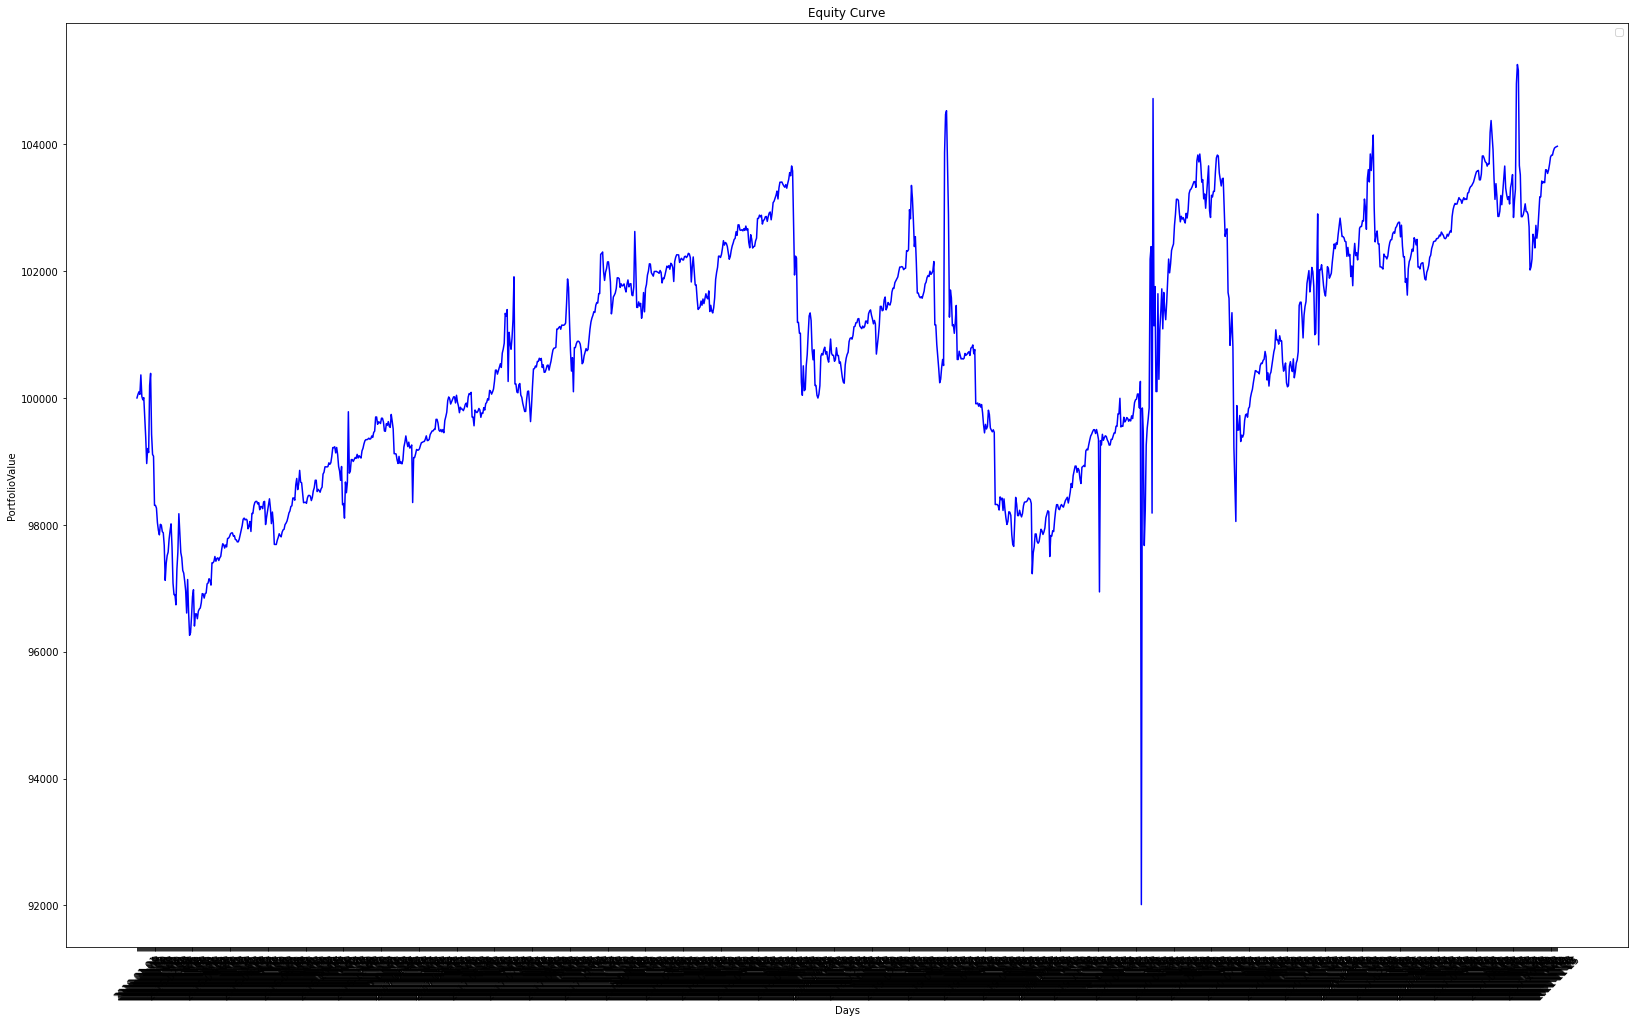

In [76]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(28,17))
plt.title('Equity Curve')
plt.xlabel('Days')
plt.ylabel('PortfolioValue')
plt.plot((result["Nifty_Date_CE"]).astype('str'),result['PortfolioValue'], c = 'blue')

plt.xticks(rotation=45)

plt.legend()
plt.show()

### Generating the Checksheet

In [60]:
#result=pd.read_csv(r'C:\Aman\Nifty correlation\07-09/pl_Test1.csv')
finallist = pd.DataFrame()
index='Nifty'
temp1 = pd.DataFrame()
tradelist = result[ (result["D_marker"] == "F") | (result["D_marker"] == "L") ]

if list(tradelist.iloc[[-1]]["D_marker"])[0] == "F":
    tradelist.drop(tradelist.tail(1).index,inplace=True)
else:
    tradelist = tradelist

tr1 = tradelist[tradelist["D_marker"]=="F"].reset_index().drop(columns = ["index"])
tr2 = tradelist[tradelist["D_marker"]=="L"].reset_index().drop(columns = ["index"])
mdict = {}
print(tr1.shape[0])
if tr1.shape[0] == tr2.shape[0]:
    for idx in tr1.index:
        
        
#         mdict["Entry_Date"] = tr1[index+ "_Date_CE"][idx]
#         mdict["Exit_Date"] = tr2[index+ "_Date_CE"][idx]
#         mdict["qty"] = tr1[index+"_qty_final"][idx]
#         mdict["Trade_Type"] = tr1["Trade_Type"][idx]
       # print(idx)
        for i in stock_list:
            mdict = {}
            #print(i)
            for j in ["CE","PE"]:
                mdict['Name']=i#.append(i)
                mdict["Entry_Date"] = tr1[index+ "_Date_CE"][idx]
                mdict["Exit_Date"] = tr2[index+ "_Date_CE"][idx]
                mdict["EQ_at_entry"] = tr1[i+ "_EQ_Close_CE"][idx]
                mdict["EQ_at_exit"] = tr2[i+ "_EQ_Close_CE"][idx]
                
                if tr1[i+ "_Ticker_CE"][idx]!='0' and tr1[i+ "_Ticker_CE"][idx]:
                    mdict["Ticker_CE"] = tr1[i+ "_Ticker_CE"][idx].replace(i,"").replace('CE-I',"")
                    mdict["_Ticker_PE"] = tr2[i+ "_Ticker_PE"][idx].replace(i,"").replace('PE-I',"")
                else:
                    mdict["Ticker_CE"] = 0#tr1[i+ "_Ticker_CE"][idx].replace(i,"").replace('CE-I',"")
                    mdict["_Ticker_PE"] = 0#tr2[i+ "_Ticker_PE"][idx].replace(i,"").replace('PE-I',"")
                
                #                 mdict["Strike"+'CE'] = tr1[i + "_At_The_Money_"+'CE'][idx]
#                 if i=='AXISBANK' or i=='IEX' or i=='RELCAPITAL':
#                     mdict["Strike"+'PE'] = tr1[i + "_At_The_Money_"+'CE'][idx]
#                 else:
#                     mdict["Strike"+'PE'] = tr1[i + "_At_The_Money_"+'PE'][idx]


                
                mdict[ "_Entry_Price_" + j] = tr1[i + "_OPT_Close_" + j][idx]
                
                mdict["_Exit_Price_" + j] = tr2[i + "_OPT_Close_" + j][idx]
                mdict["_Qty_final"] = tr1[i + "_qty_final"][idx]
                mdict["Exposure"] = tr1[i + "_exp"][idx]
                mdict["P/L"] = tr1[ "plvalue_"+i][idx]
            temp = pd.DataFrame([mdict])
            temp1=temp1.append(temp)
        #display(temp)
    finallist = finallist.append(temp1)
else:
    print("Error, Tradelist not proper")

finallist.reset_index().drop(columns = ["index"])


71


,Name,Entry_Date,Exit_Date,EQ_at_entry,EQ_at_exit,Ticker_CE,_Ticker_PE,_Entry_Price_CE,_Exit_Price_CE,_Qty_final,Exposure,P/L,_Entry_Price_PE,_Exit_Price_PE
0,ACC,2016-01-01,2016-01-28,1373.6500,1214.9500,1400,1360,18.000000,0.05,0.787984,202.272000,0.0,17.200000,145.0500
1,AMBUJACEM,2016-01-01,2016-01-28,205.6500,193.2000,210,200,4.200000,0.05,6.854637,263.424000,0.0,3.000000,6.8000
2,AXISBANK,2016-01-01,2016-01-28,449.9000,405.6500,470,440,6.750000,0.05,14.211597,1194.816000,0.0,8.250000,34.3500
3,BAJAJ_AUTO,2016-01-01,2016-01-28,2518.0000,2263.3999,2600,2450,30.500000,0.05,1.179645,555.072000,0.0,34.550000,186.6001
4,BHEL,2016-01-01,2016-01-28,113.9300,91.2700,120,110,1.966667,0.05,10.163538,216.384000,0.0,2.166667,18.7300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5746,SHREECEM,2021-10-29,2021-11-25,28635.2500,26670.5000,30000,28000,624.700000,0.05,0.082969,101.547619,0.0,782.750000,1329.5000
5747,HDFCLIFE,2021-10-29,2021-11-25,680.4500,688.8000,700,670,10.400000,0.05,5.796029,168.569048,0.0,11.000000,0.0500
5748,DIVISLAB,2021-10-29,2021-11-25,5150.1499,4799.7998,5400,5000,121.700000,0.05,0.793464,174.661905,0.0,110.000000,200.2002
5749,SBILIFE,2021-10-29,2021-11-25,1145.5500,1159.5000,1190,1120,19.500000,0.05,2.737654,134.042857,0.0,16.350000,0.0500


In [61]:
finallist.to_csv(output_path+'/final check2.csv')

In [79]:
### Calculate CAGR 
result=pd.read_csv(r"C:\Aman\Nifty correlation\nifty 50\with missing stocks\45 delta"+"/pl1 45.csv")
df = result.copy()
from pyxirr import xirr

firstValue = round(df.loc[0, 'PortfolioValue'],4)
lastValue = round(df.loc[df.index[-1], 'PortfolioValue'],4)

firstDate = (df.loc[0, 'Nifty_Date_CE'])
lastDate = (df.loc[df.index[-1], 'Nifty_Date_CE'])

dates = [firstDate, lastDate]
amounts = [-firstValue, lastValue]

xirr = xirr(dates, amounts)

print(xirr)
### Calculate Daily Drawdown

Roll_Max = round(df['PortfolioValue'].expanding().max(), 2)
Daily_Drawdown = (round(df['PortfolioValue'], 2)/Roll_Max) - 1.0


#Roll_Max[0:50], Daily_Drawdown[0:50]

df['Daily_Drawdown'] = Daily_Drawdown * 100

print("max dd", min(df['Daily_Drawdown']))
print(100*xirr/-min(df['Daily_Drawdown']))
# #df.to_csv(output_path + '/DailyDrawdown.csv', index=False)

### Monthly PNL Percentage 

df['Nifty_Date_CE'] = pd.to_datetime(df['Nifty_Date_CE'], dayfirst=True)

df['Year'] = pd.DatetimeIndex(df['Nifty_Date_CE']).year
df['Month'] = pd.DatetimeIndex(df['Nifty_Date_CE']).month
#df.to_csv(output_path + '/df.csv', index=False)

i = 0
dfg = df.groupby(['Year', 'Month'])
for name, group in dfg:
    #print(name)
    if i == 0: 
        firstValue = group['PortfolioValue'].iloc[0]
        i = 1
    else:
        firstValue = lastValue

    lastValue = group['PortfolioValue'].loc[group.index[-1]]
    change = lastValue/firstValue - 1
    df.loc[group.index, 'Change_%_Monthly'] = round(change * 100, 2)
    
i = 0
dfg = df.groupby(['Year'])
for name, group in dfg:
    #print(name)
    if i == 0: 
        firstValue = group['PortfolioValue'].iloc[0]
        i = 1
    else:
        firstValue = lastValue

    lastValue = group['PortfolioValue'].loc[group.index[-1]]
    change = lastValue/firstValue - 1
    df.loc[group.index, 'Change_%_Yearly'] = change * 100
    
df

df1 = df[['Year', 'Month', 'Change_%_Monthly', 'Change_%_Yearly']]
df1 = df1.drop_duplicates()
df1

pivotTable = df1.pivot_table(values ='Change_%_Monthly', index =['Year', 'Change_%_Yearly'],
                         columns =['Month'])
pivotTable.columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
                      'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

pivotTable.index

def _color_red_or_green(val):
    color = '#EE0000' if val < 0 else '#00EE00'
    return 'background-color: %s' % color
pivotTable=pivotTable.style.applymap(_color_red_or_green)
display(pivotTable)

import pandas as pd
import openpyxl as op
import numpy as np


from openpyxl import Workbook, worksheet, load_workbook
# pivotTable.to_excel(r"C:\Aman\Nifty correlation\nifty 50\with missing stocks\40 delta"+'/t1.xlsx')#.to_csv(r'C:\Aman\Nifty correlation\nifty 50\19-09\pl 50 table.csv')

0.153763241316788
max dd -22.114811264524235
0.6952952909141455


,,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,Change_%_Yearly,,,,,,,,,,,,
2016,14.702103,5.760000,3.860000,4.390000,1.240000,-2.400000,-0.270000,1.750000,1.040000,-2.320000,-2.160000,4.140000,-0.790000
2017,19.462228,1.380000,1.860000,2.320000,-2.620000,-1.610000,0.560000,1.600000,0.220000,2.980000,4.370000,2.450000,4.650000
2018,20.700535,-0.370000,5.670000,3.080000,2.020000,-6.340000,-0.690000,2.080000,-1.820000,3.930000,5.710000,3.650000,2.700000
2019,-16.952395,-6.490000,0.990000,2.120000,-2.410000,-9.980000,-0.600000,0.040000,2.560000,-2.670000,0.870000,-1.070000,-1.040000
2020,46.203290,-0.110000,4.170000,-1.750000,7.860000,0.580000,7.440000,3.200000,5.610000,3.950000,-0.570000,0.210000,8.690000
2021,15.863956,-0.980000,4.220000,-1.170000,1.580000,5.590000,2.550000,-4.230000,3.500000,2.390000,-0.050000,1.820000,nan


In [64]:
output_path

'C:\\Aman\\Nifty correlation\\nifty 50\\with missing stocks/35 delta'